# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1574029810_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/691691381_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1887699190_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1479140596_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1275028674_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1640899500_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1574029810_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, succes

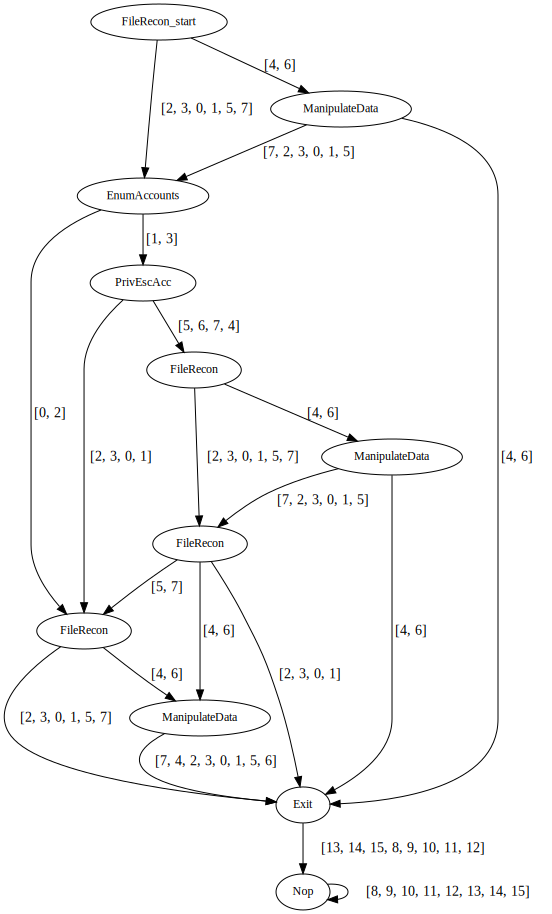

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/691691381_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure),

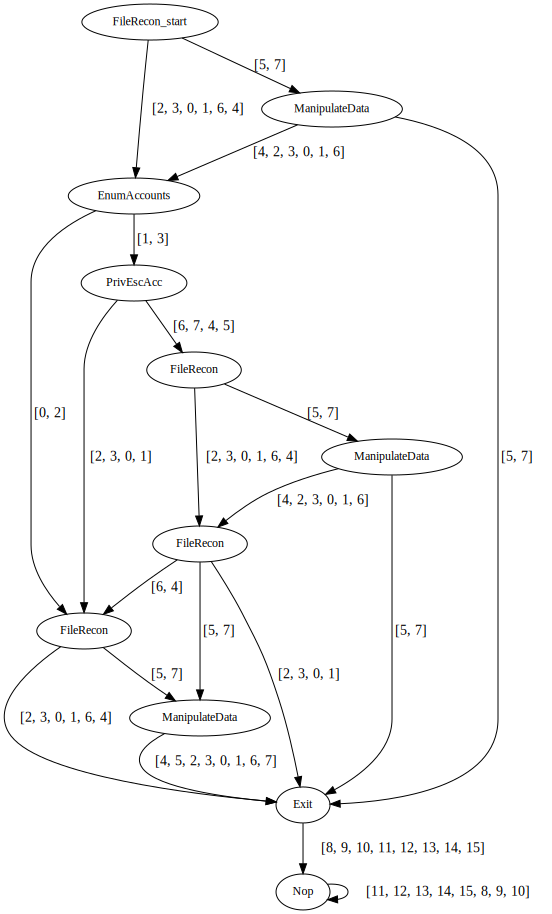

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1887699190_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


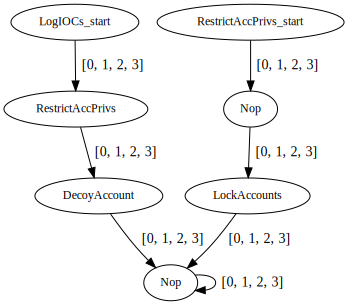

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1479140596_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


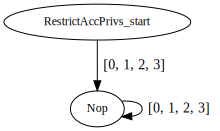

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1275028674_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnS

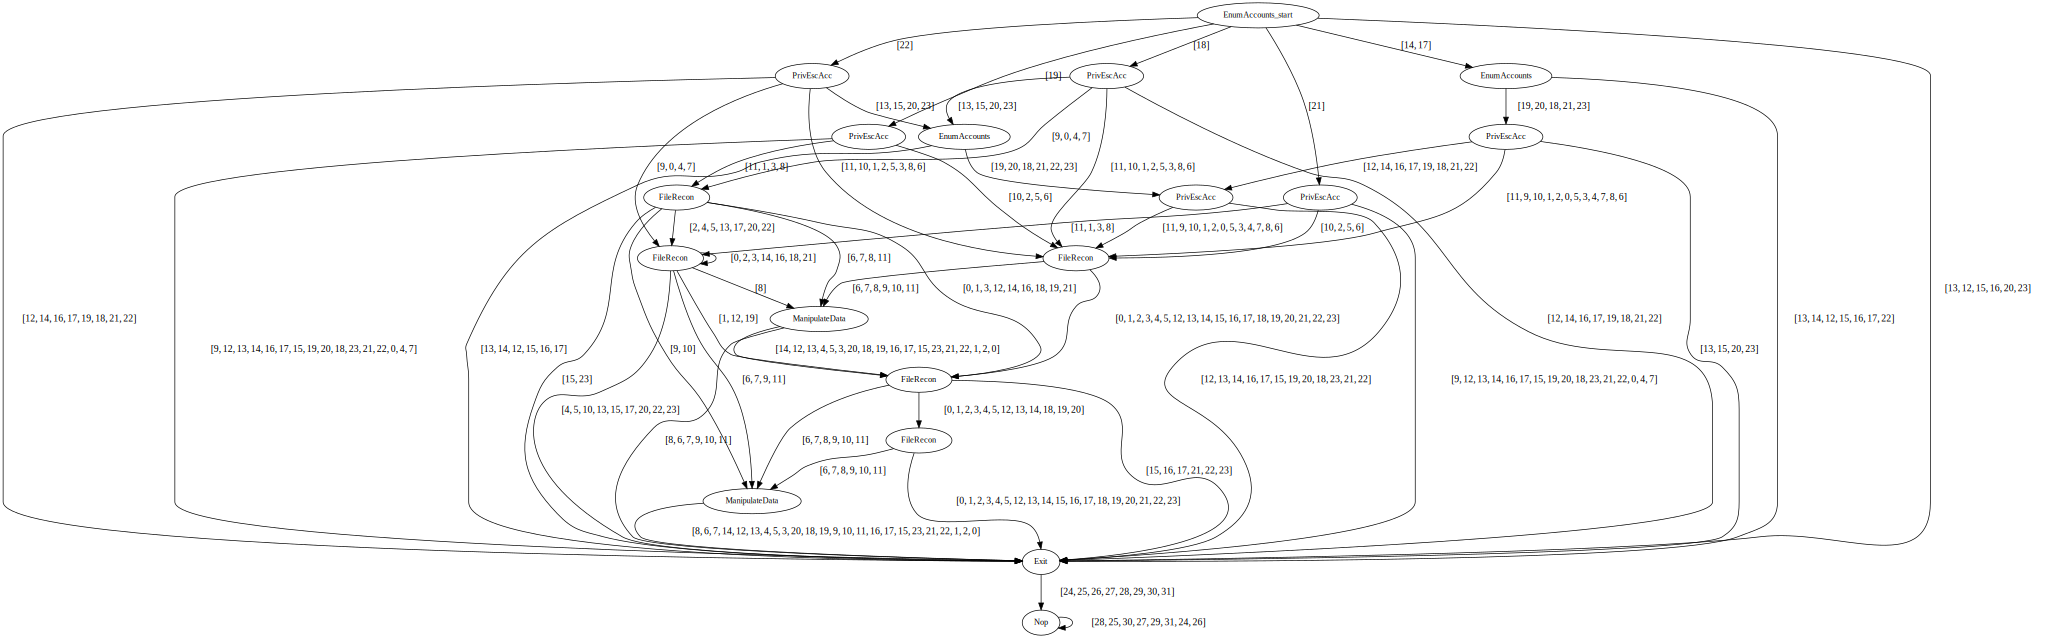

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1640899500_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


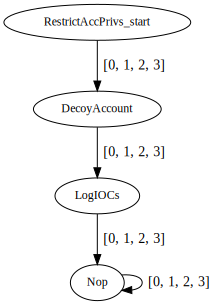

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                             none

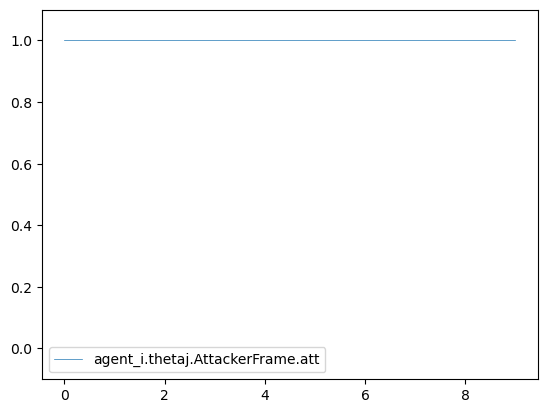

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.253112                        0.746888   
2                         0.334019                        0.665982   
3                         0.001541                        0.998459   
4                         0.002156                        0.997844   
5                         0.002156                        0.997844   
6                         0.002156                        0.997844   
7                         0.002156                        0.997844   
8                         0.002156                        0.997844   
9                         0.002156                        0.997844   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                         none   
6                          denied                         none   
7                          denied                         none   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

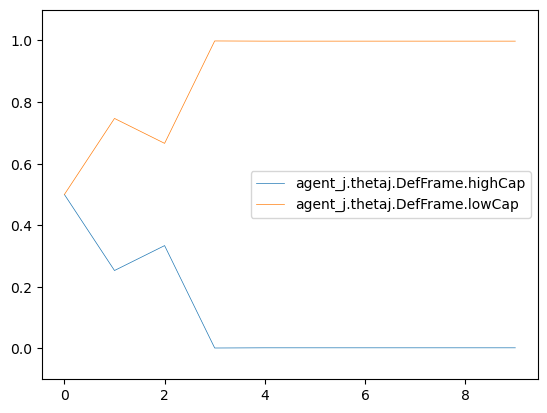

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop  ManipulateData
5                  0.0                   1.0               Nop            Exit
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

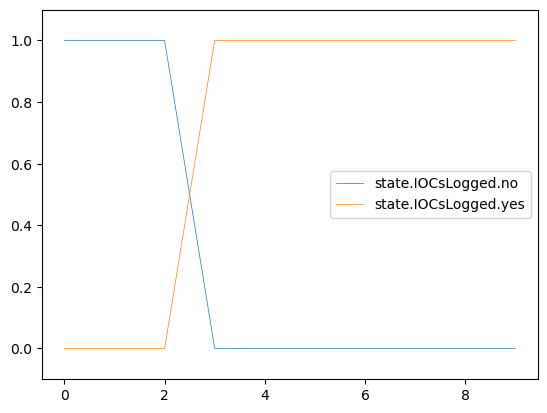

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

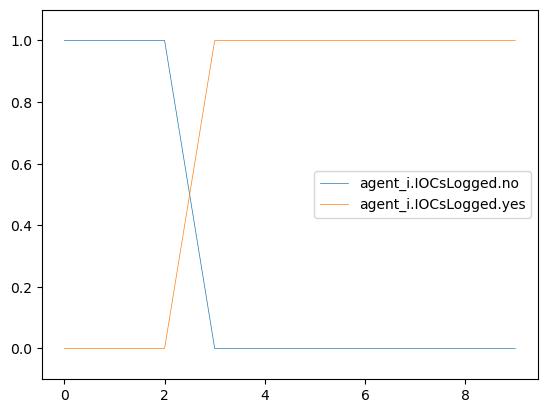

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.970954                0.029046    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.997844                0.002156  ManipulateData   
5               0.997844                0.002156            Exit   
6               0.997844                0.002156             Nop   
7               0.997844                0.002156             Nop   
8               0.997844                0.002156             Nop   
9               0.997844                0.002156             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

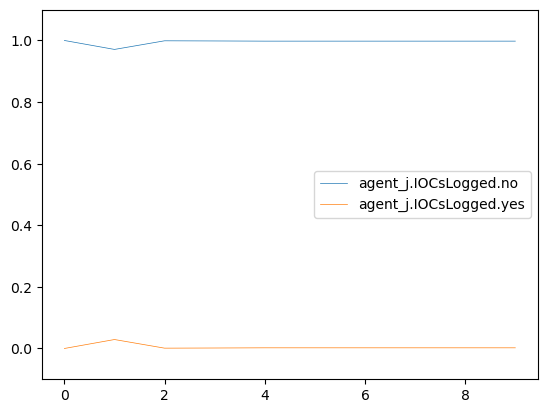

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

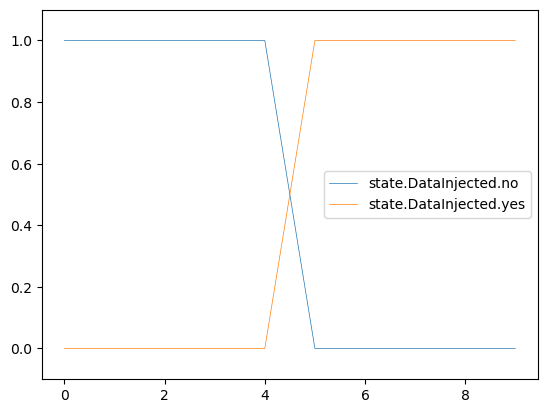

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.098181                  0.901819               Nop   
6                 0.016954                  0.983046               Nop   
7                 0.017964                  0.982036               Nop   
8                 0.013883                  0.986117               Nop   
9                 0.013882                  0.986118               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

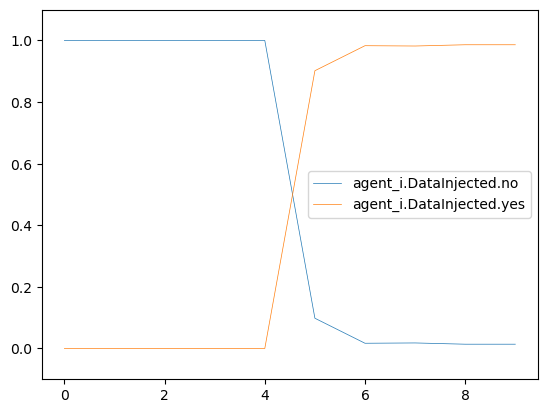

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000052                  0.999948            Exit   
6                 0.000052                  0.999948             Nop   
7                 0.000052                  0.999948             Nop   
8                 0.000052                  0.999948             Nop   
9                 0.000052                  0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

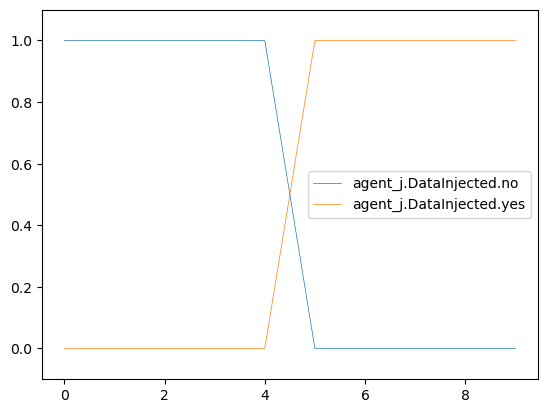

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

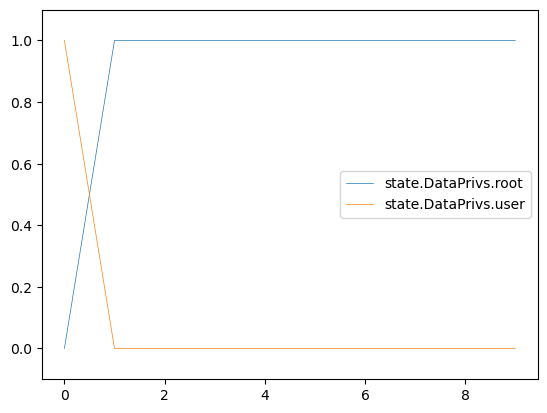

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

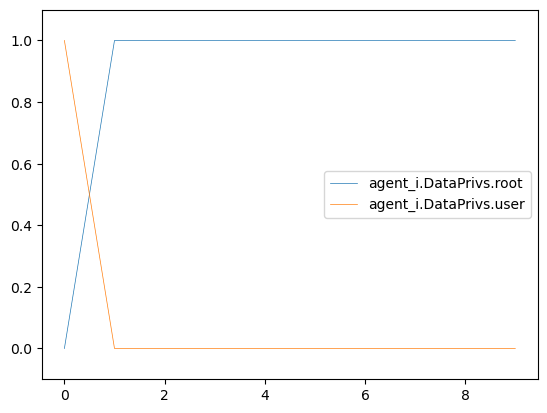

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.985477                0.014523    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000  ManipulateData   
5                1.000000                0.000000            Exit   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

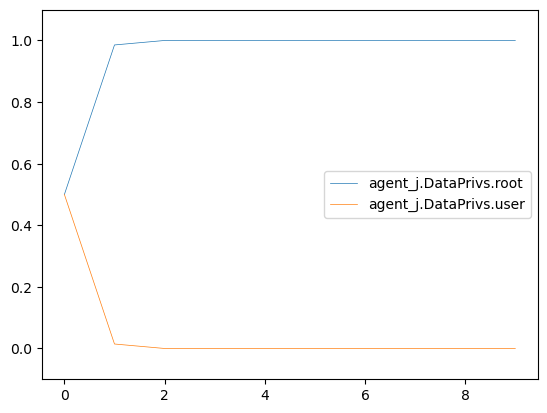

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

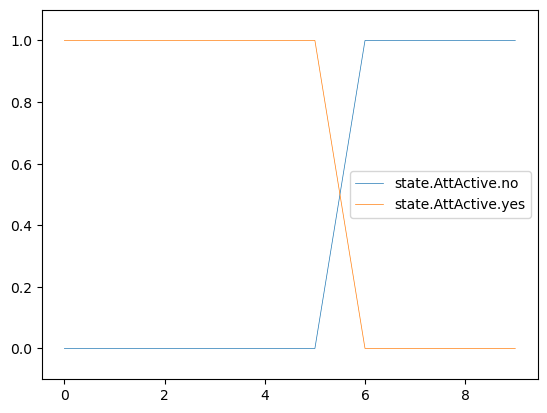

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837883e-01           LogIOCs   
3              0.078750           9.212501e-01               Nop   
4              0.018743           9.812574e-01               Nop   
5              0.004052           9.959480e-01               Nop   
6              0.986252           1.374768e-02               Nop   
7              0.990057           9.943220e-03               Nop   
8              0.995768           4.231931e-03               Nop   
9              1.000000           2.606355e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

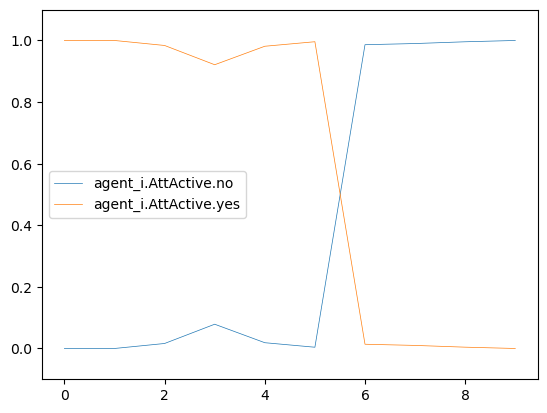

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

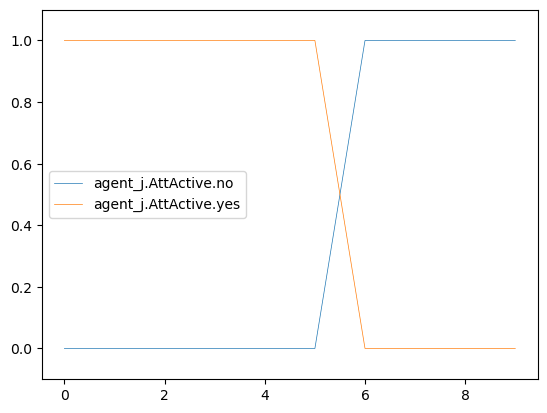

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

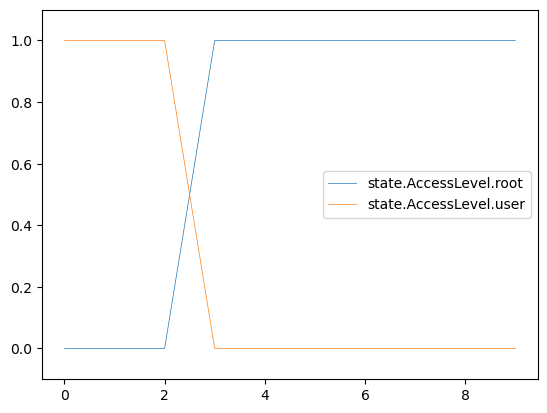

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.876566                  0.123434               Nop   
4                  0.980576                  0.019424               Nop   
5                  0.995948                  0.004052               Nop   
6                  0.995614                  0.004386               Nop   
7                  0.995636                  0.004364               Nop   
8                  0.995636                  0.004364               Nop   
9                  0.995636                  0.004364               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

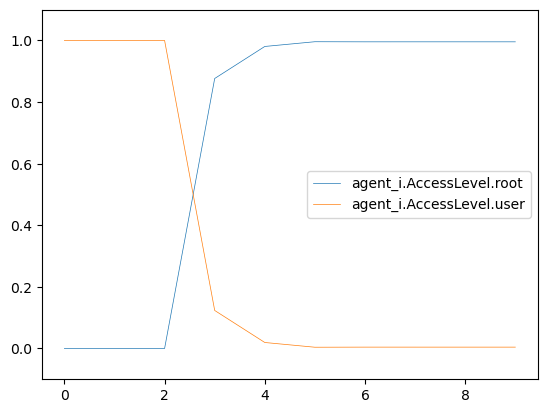

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

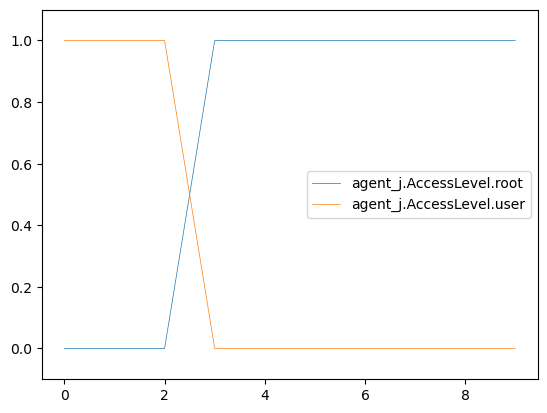

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

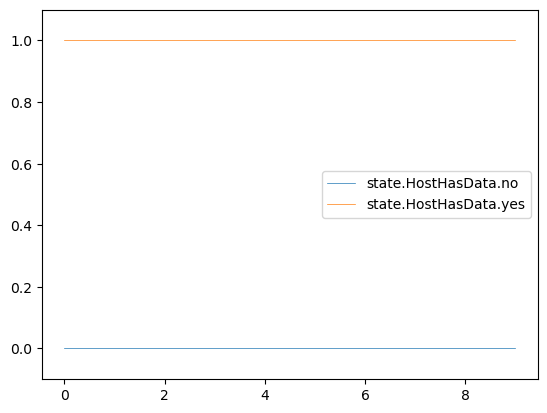

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

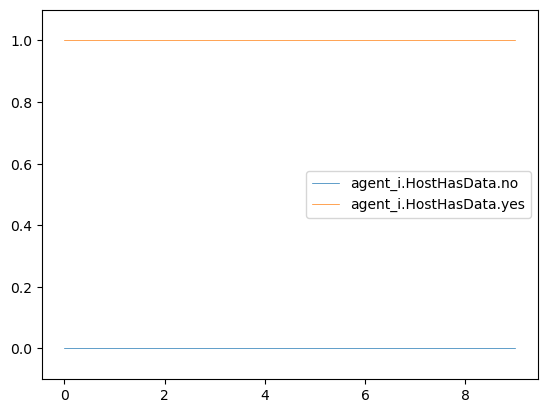

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.071942                 0.928058  ManipulateData   
5                0.000040                 0.999960            Exit   
6                0.000040                 0.999960             Nop   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

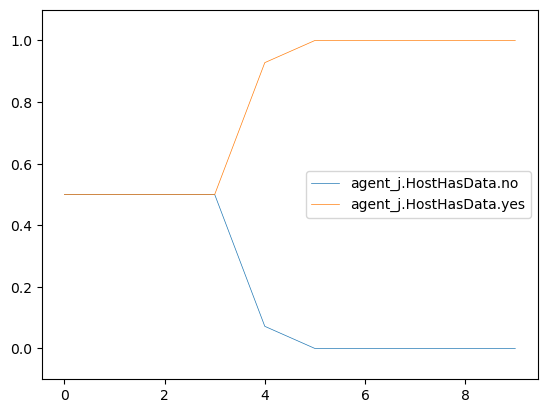

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

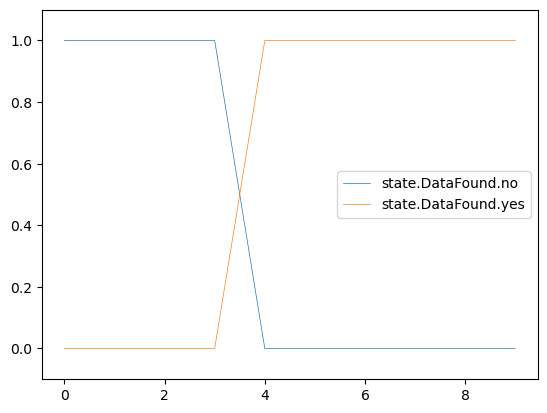

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.313804               0.686196               Nop   
5              0.043027               0.956973               Nop   
6              0.012640               0.987359               Nop   
7              0.013231               0.986769               Nop   
8              0.013231               0.986769               Nop   
9              0.013231               0.986769               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

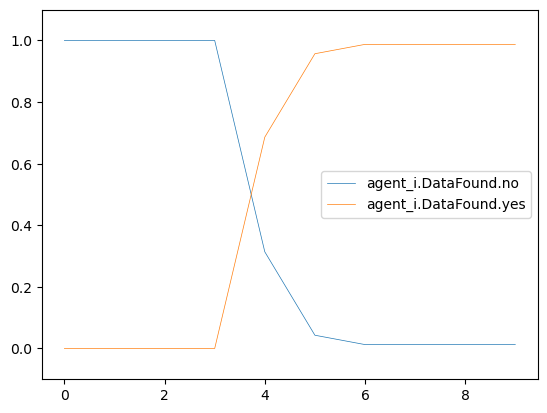

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.093525               0.906475  ManipulateData   
5              0.000052               0.999948            Exit   
6              0.000052               0.999948             Nop   
7              0.000052               0.999948             Nop   
8              0.000052               0.999948             Nop   
9              0.000052               0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

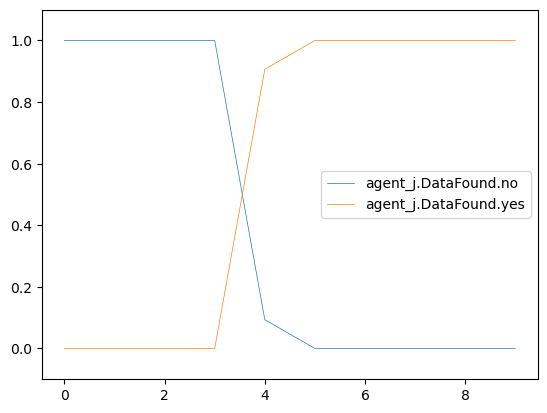

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

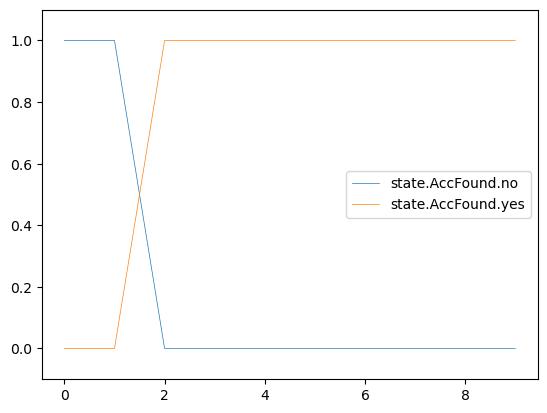

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.102414              0.897586               Nop   
4             0.016362              0.983638               Nop   
5             0.003413              0.996587               Nop   
6             0.003695              0.996305               Nop   
7             0.003676              0.996324               Nop   
8             0.003676              0.996324               Nop   
9             0.003676              0.996324               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

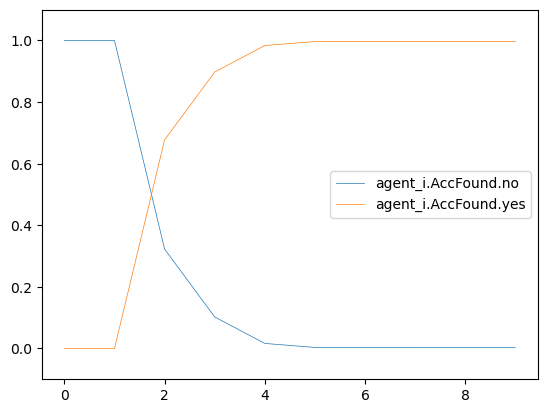

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

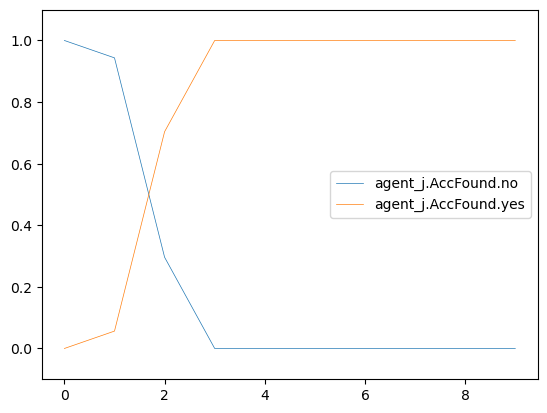

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

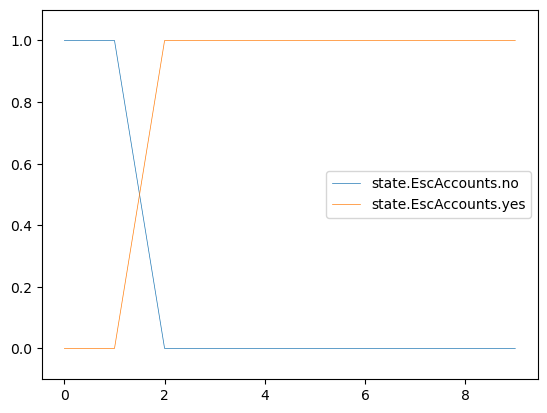

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

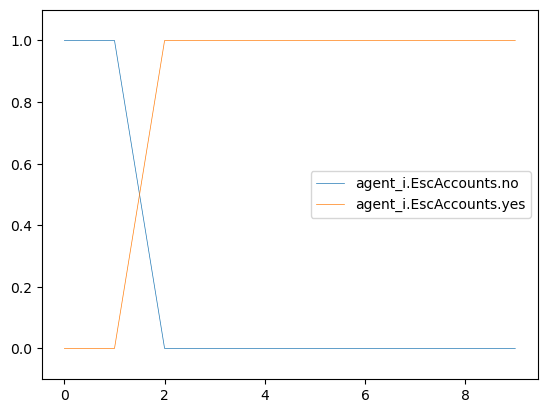

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

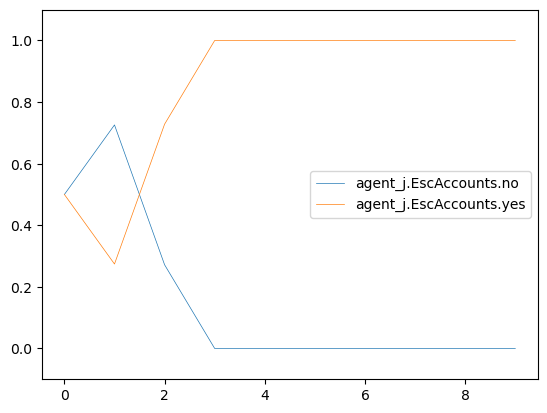

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

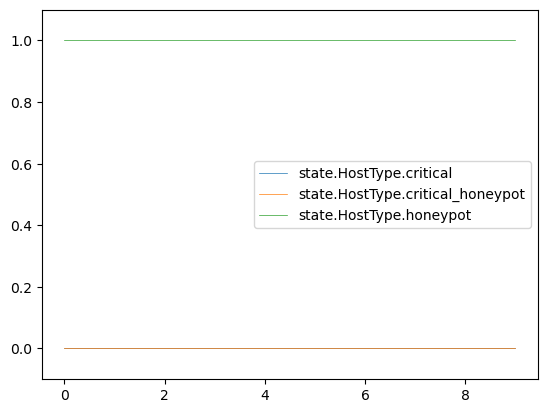

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                        file_enum  
7                   login_activity  
8                             none  
9                             none

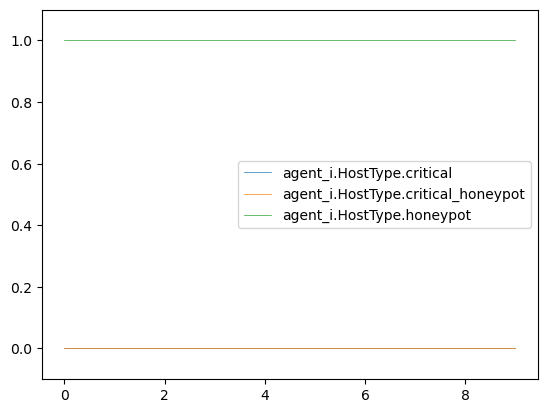

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.448133                                 0.0   
2                   0.665982                                 0.0   
3                   0.499230                                 0.0   
4                   0.299353                                 0.0   
5                   0.299353                                 0.0   
6                   0.299353                                 0.0   
7                   0.299353                                 0.0   
8                   0.299353                                 0.0   
9                   0.299353                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts  RestrictAccPrivs   
1                   0.551867    EnumAccounts      DecoyAccount   
2                   0.334019      PrivEscAcc           LogIOCs   
3                   0.500770       FileRecon               Nop   
4                   0.700647  ManipulateData               Nop   
5                   0.700647            Exit               Nop   
6                   0.700647             Nop               Nop   
7                   0.700647             Nop               Nop   
8                   0.700647             Nop               Nop   
9                   0.700647             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                         none   
6                          denied                         none   
7                          denied                         none   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

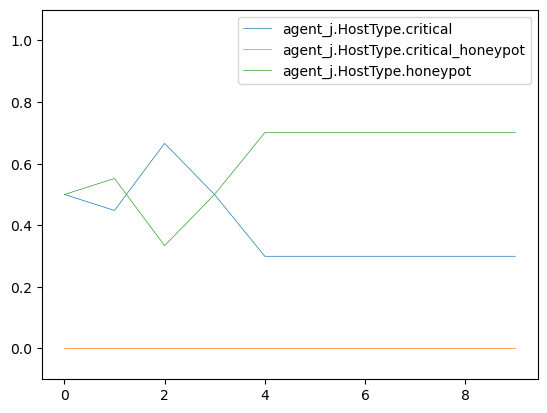

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

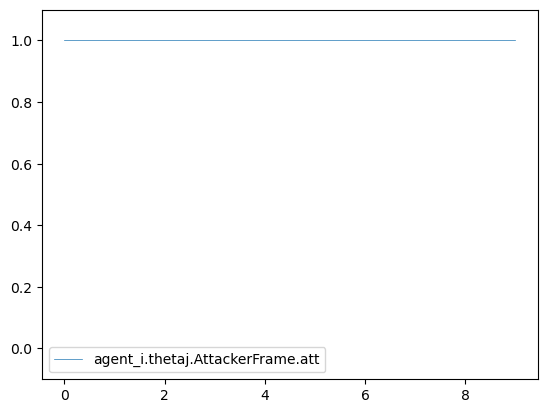

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.253112                        0.746888   
2                         0.136278                        0.863722   
3                         0.136278                        0.863722   
4                         0.136278                        0.863722   
5                         0.136278                        0.863722   
6                         0.136278                        0.863722   
7                         0.136278                        0.863722   
8                         0.136278                        0.863722   
9                         0.136278                        0.863722   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

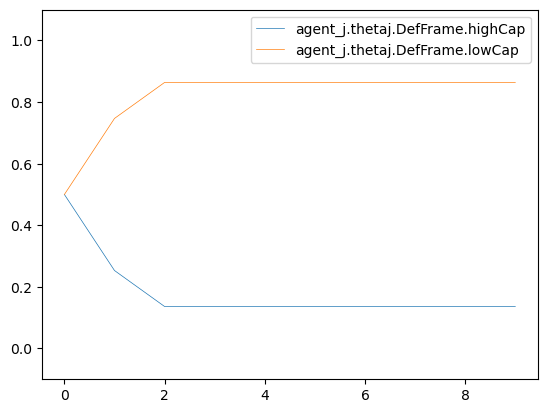

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs           Exit
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

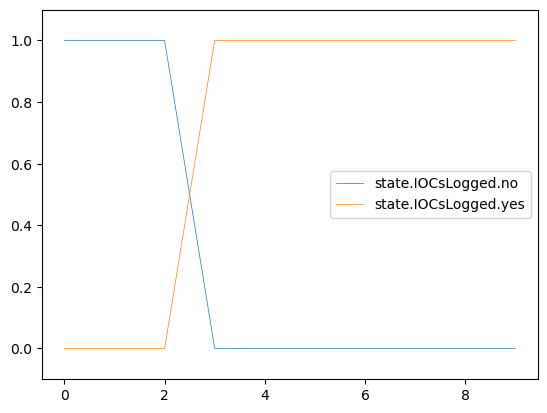

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

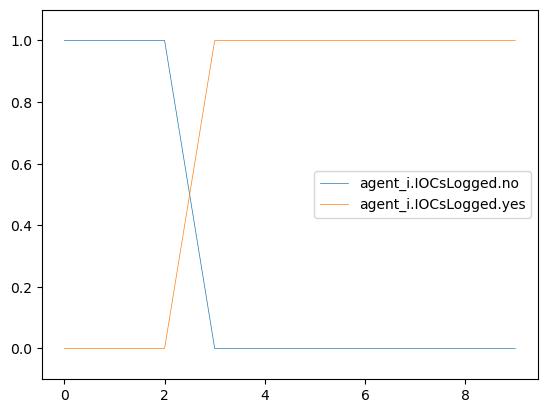

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.970954                0.029046   EnumAccounts   
2               0.997748                0.002252           Exit   
3               0.997748                0.002252            Nop   
4               0.997748                0.002252            Nop   
5               0.997748                0.002252            Nop   
6               0.997748                0.002252            Nop   
7               0.997748                0.002252            Nop   
8               0.997748                0.002252            Nop   
9               0.997748                0.002252            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

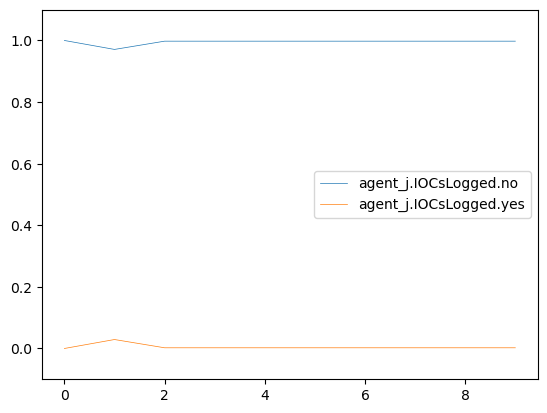

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

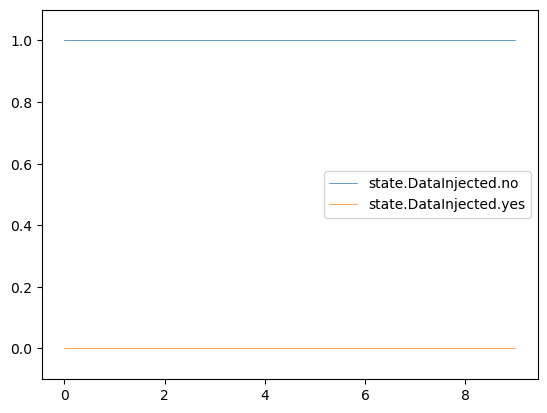

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.982893                  0.017107               Nop   
6                 0.981522                  0.018478               Nop   
7                 0.981467                  0.018533               Nop   
8                 0.981466                  0.018534               Nop   
9                 0.981466                  0.018534               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

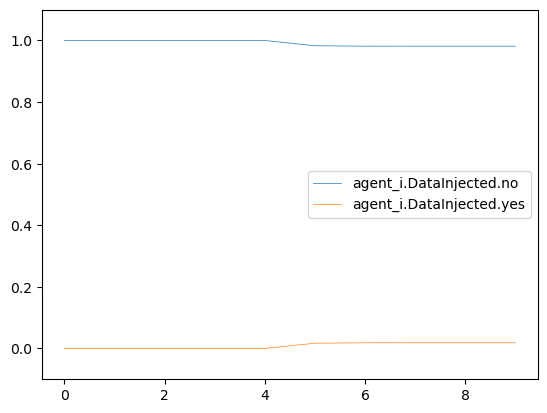

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

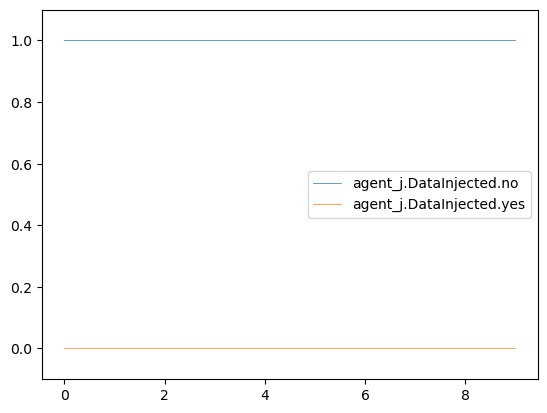

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs           Exit
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

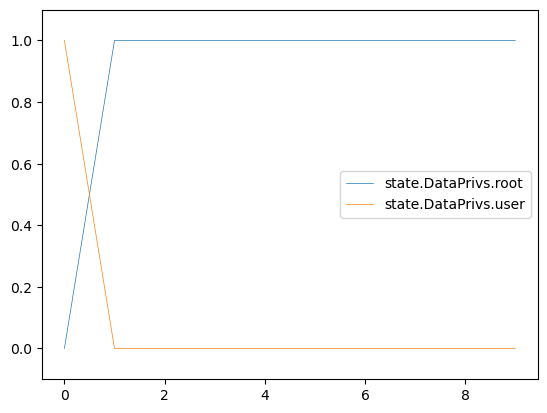

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

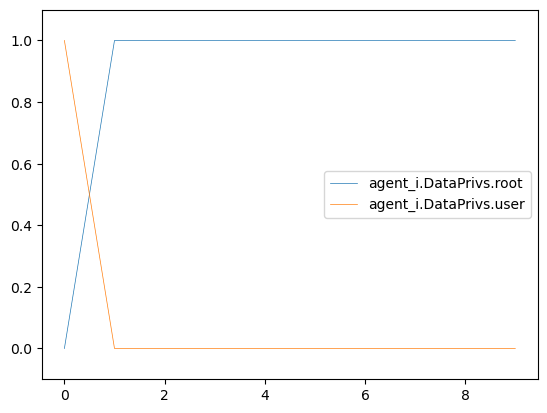

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.985477                0.014523   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

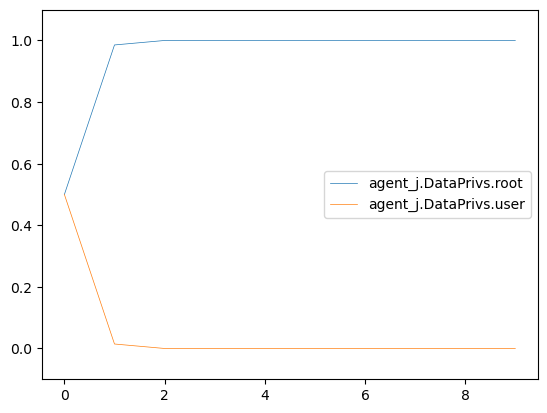

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

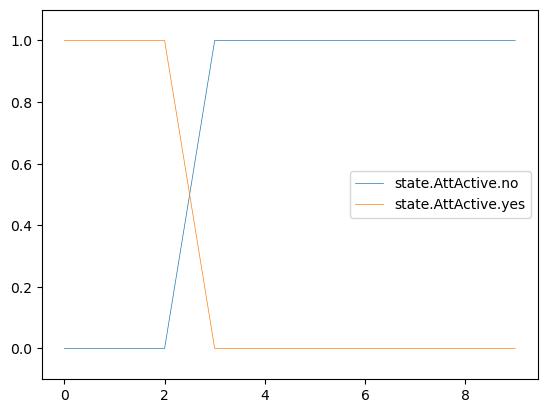

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837883e-01           LogIOCs   
3              0.341597           6.584026e-01               Nop   
4              0.820632           1.793681e-01               Nop   
5              0.970032           2.996813e-02               Nop   
6              0.998259           1.741624e-03               Nop   
7              0.999940           5.976746e-05               Nop   
8              0.999999           8.114328e-07               Nop   
9              1.000000           2.273700e-08               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

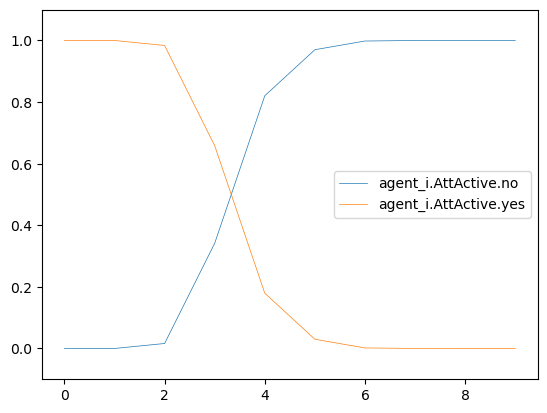

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

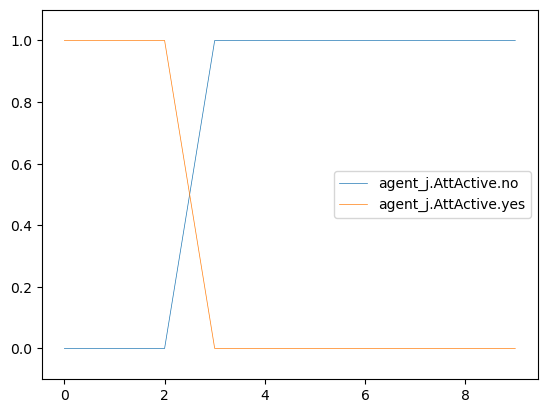

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

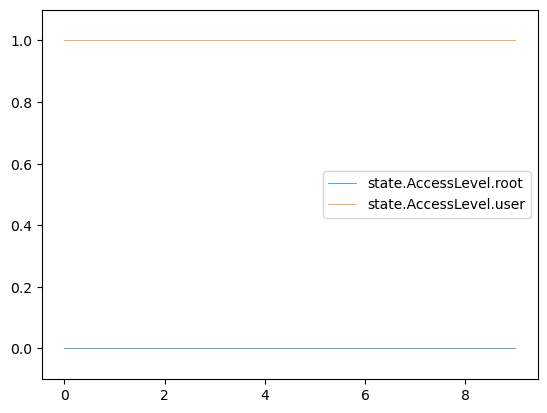

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.543189                  0.456811               Nop   
4                  0.177806                  0.822194               Nop   
5                  0.029968                  0.970032               Nop   
6                  0.019832                  0.980168               Nop   
7                  0.019480                  0.980520               Nop   
8                  0.019475                  0.980525               Nop   
9                  0.019475                  0.980525               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

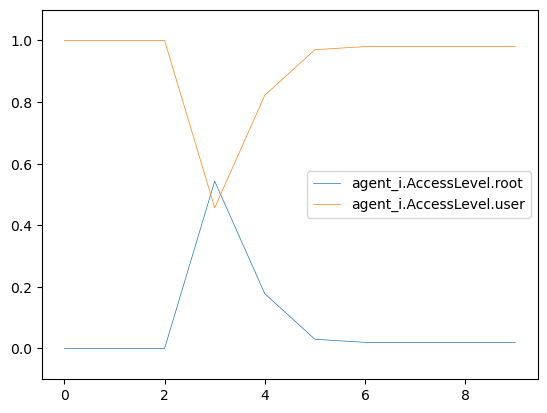

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

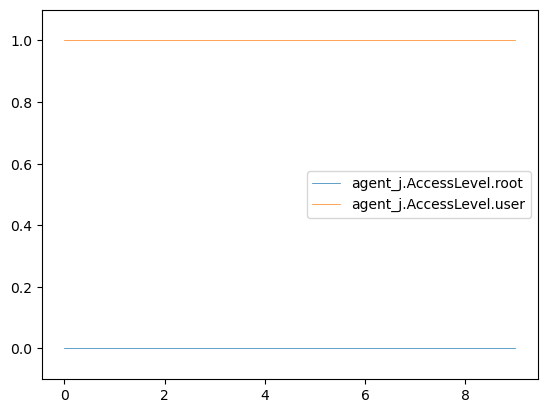

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

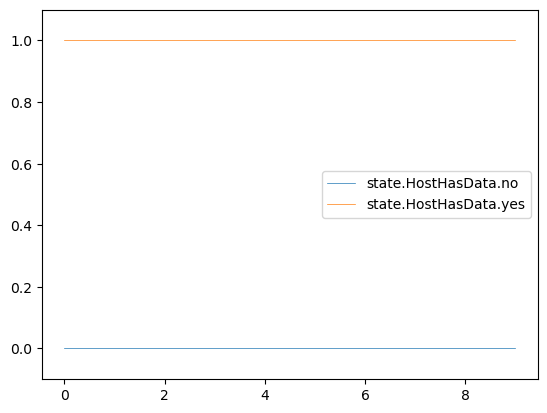

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

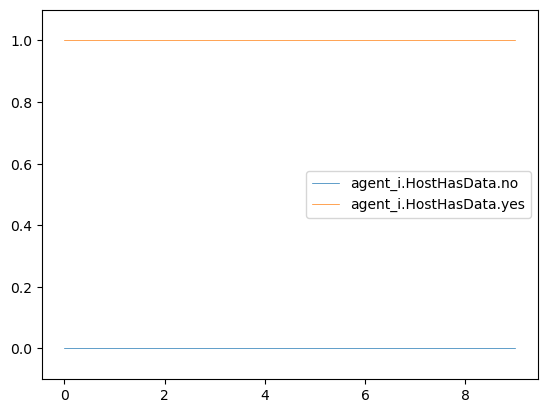

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

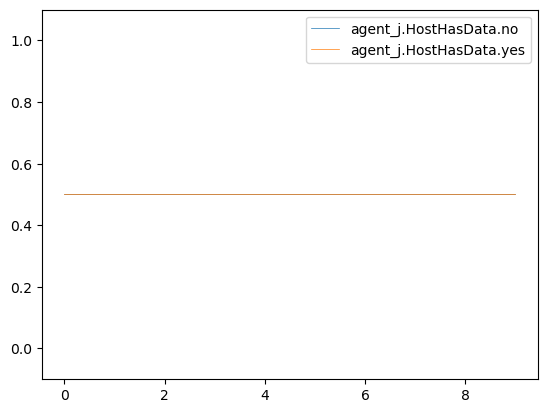

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

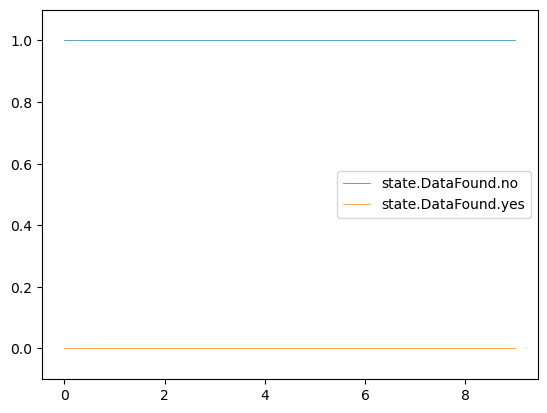

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.887223               0.112777               Nop   
5              0.973605               0.026395               Nop   
6              0.981125               0.018875               Nop   
7              0.981436               0.018564               Nop   
8              0.981441               0.018559               Nop   
9              0.981441               0.018559               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

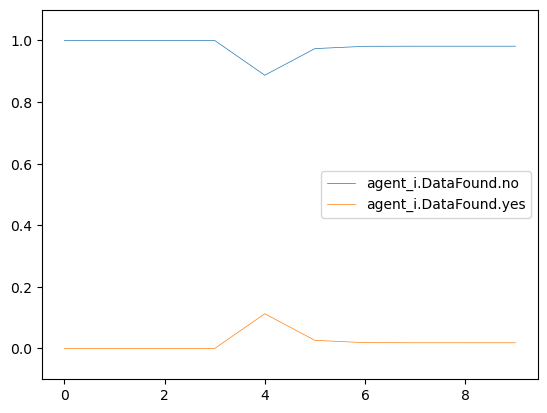

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

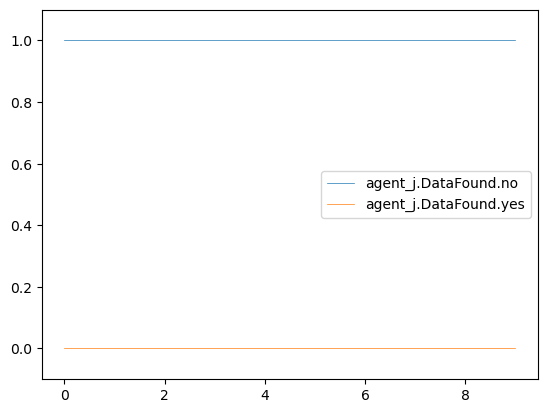

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                0.0                 1.0           LogIOCs           Exit
3                0.0                 1.0               Nop            Nop
4                0.0                 1.0               Nop            Nop
5                0.0                 1.0               Nop            Nop
6                0.0                 1.0               Nop            Nop
7                0.0                 1.0               Nop            Nop
8                0.0                 1.0               Nop            Nop
9                0.0                 1.0               Nop            Nop

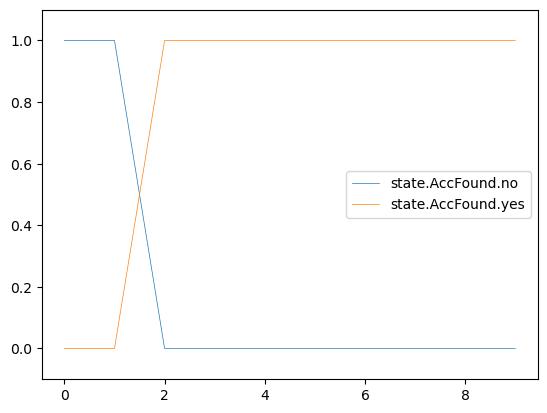

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304           LogIOCs           Exit   
3             0.312023              0.687977               Nop            Nop   
4             0.638452              0.361548               Nop            Nop   
5             0.753251              0.246749               Nop            Nop   
6             0.761123              0.238877               Nop            Nop   
7             0.761396              0.238604               Nop            Nop   
8             0.761399              0.238601               Nop            Nop   
9             0.761399              0.238601               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

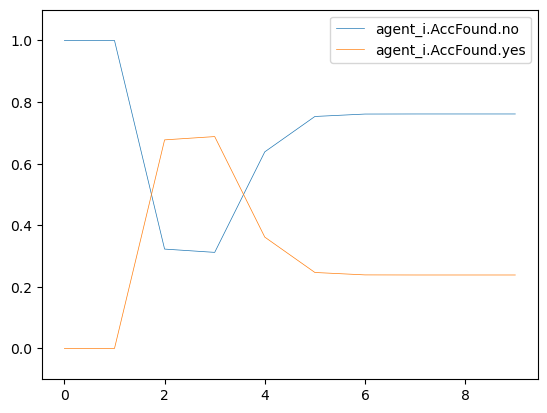

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit           LogIOCs   
3             0.971501              0.028499            Nop               Nop   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

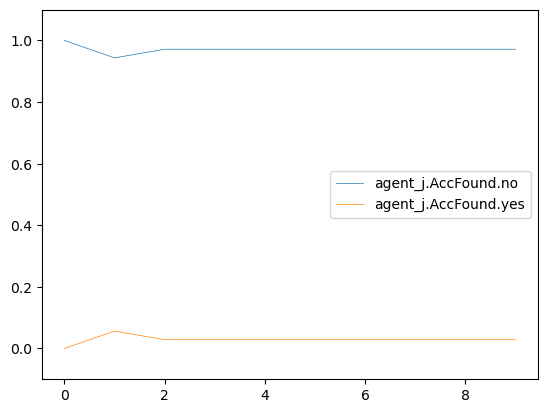

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

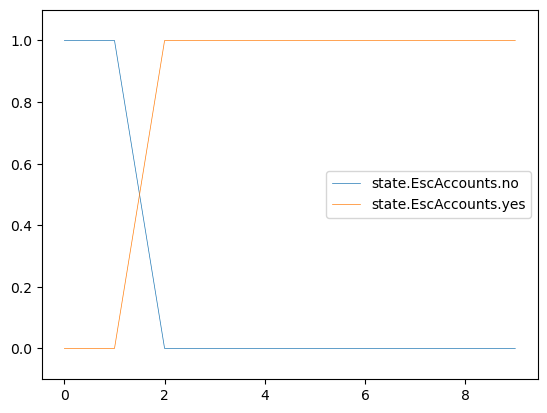

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

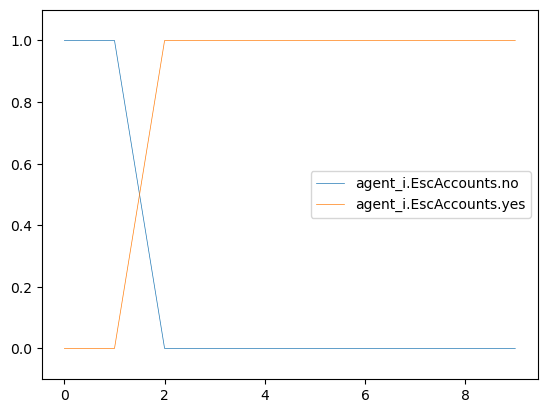

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.889278                 0.110722            Nop   
4                0.889278                 0.110722            Nop   
5                0.889278                 0.110722            Nop   
6                0.889278                 0.110722            Nop   
7                0.889278                 0.110722            Nop   
8                0.889278                 0.110722            Nop   
9                0.889278                 0.110722            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

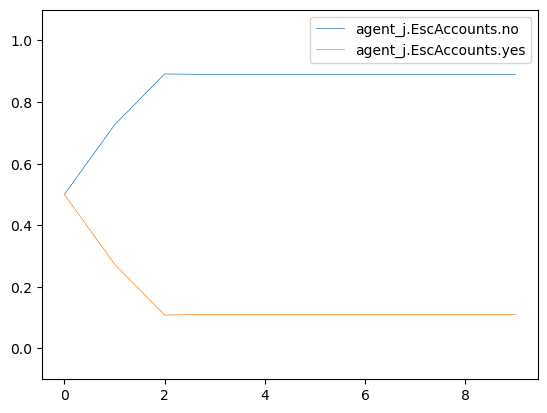

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs           Exit  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

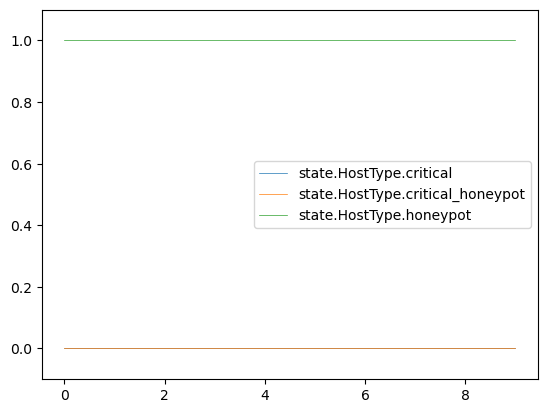

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs           Exit   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

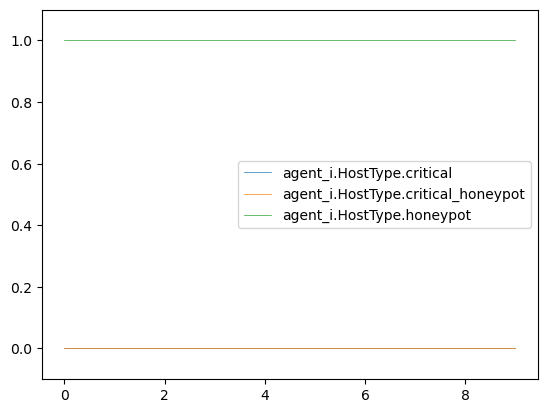

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.448133                                 0.0   
2                   0.268052                                 0.0   
3                   0.268052                                 0.0   
4                   0.268052                                 0.0   
5                   0.268052                                 0.0   
6                   0.268052                                 0.0   
7                   0.268052                                 0.0   
8                   0.268052                                 0.0   
9                   0.268052                                 0.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                   0.500000   EnumAccounts  RestrictAccPrivs   
1                   0.551867   EnumAccounts      DecoyAccount   
2                   0.731948           Exit           LogIOCs   
3                   0.731948            Nop               Nop   
4                   0.731948            Nop               Nop   
5                   0.731948            Nop               Nop   
6                   0.731948            Nop               Nop   
7                   0.731948            Nop               Nop   
8                   0.731948            Nop               Nop   
9                   0.731948            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

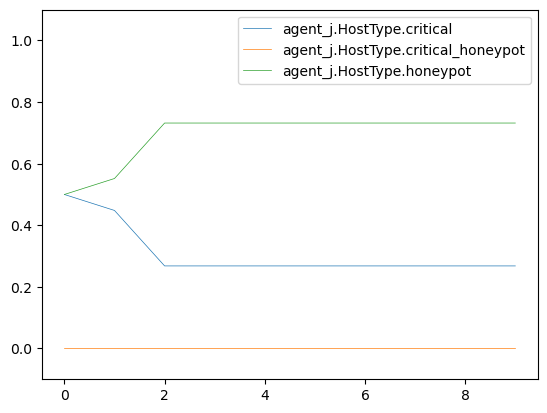

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

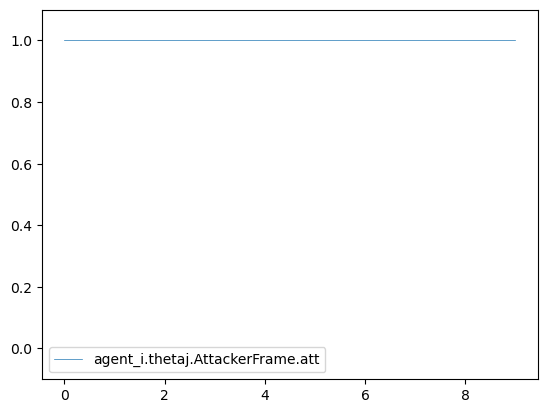

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.417476                        0.582524   
2                         0.334018                        0.665982   
3                         0.001541                        0.998459   
4                         0.002156                        0.997844   
5                         0.002156                        0.997844   
6                         0.002156                        0.997844   
7                         0.002156                        0.997844   
8                         0.002156                        0.997844   
9                         0.002156                        0.997844   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

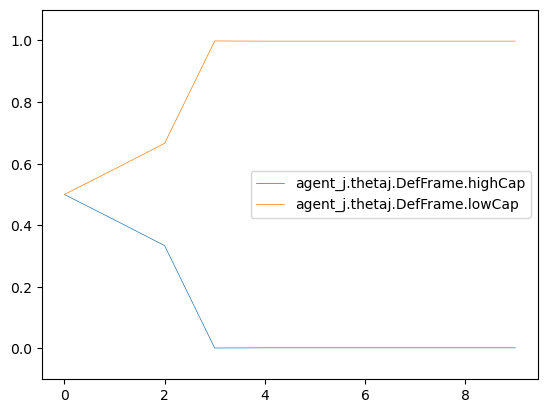

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop  ManipulateData
5                  0.0                   1.0               Nop            Exit
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

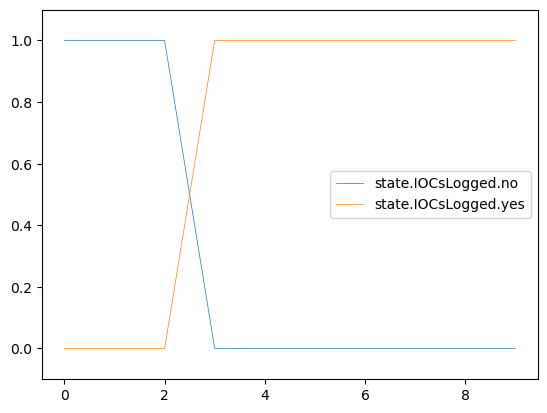

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

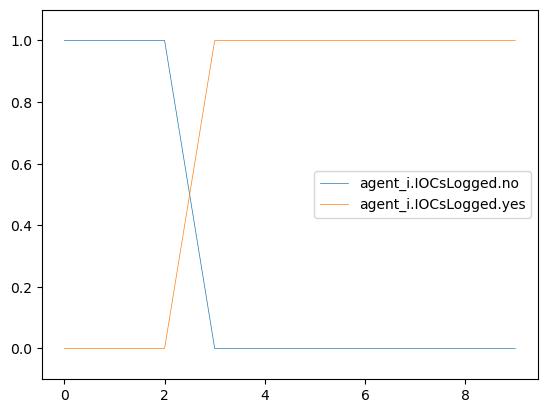

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.990291                0.009709    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.997844                0.002156  ManipulateData   
5               0.997844                0.002156            Exit   
6               0.997844                0.002156             Nop   
7               0.997844                0.002156             Nop   
8               0.997844                0.002156             Nop   
9               0.997844                0.002156             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

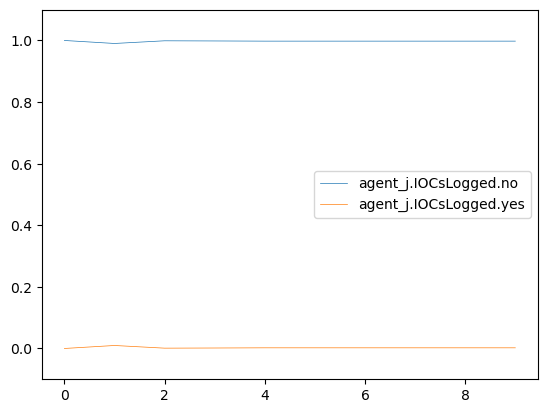

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

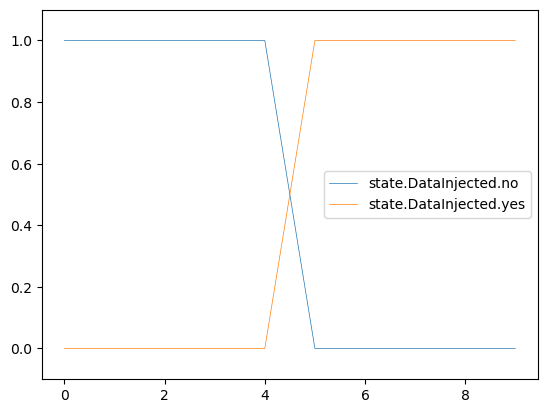

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.309959                  0.690041               Nop   
6                 0.165030                  0.834970               Nop   
7                 0.156300                  0.843700               Nop   
8                 0.156071                  0.843929               Nop   
9                 0.156070                  0.843930               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

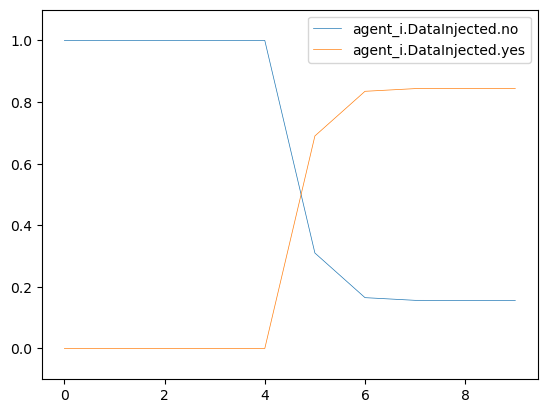

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000052                  0.999948            Exit   
6                 0.000052                  0.999948             Nop   
7                 0.000052                  0.999948             Nop   
8                 0.000052                  0.999948             Nop   
9                 0.000052                  0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

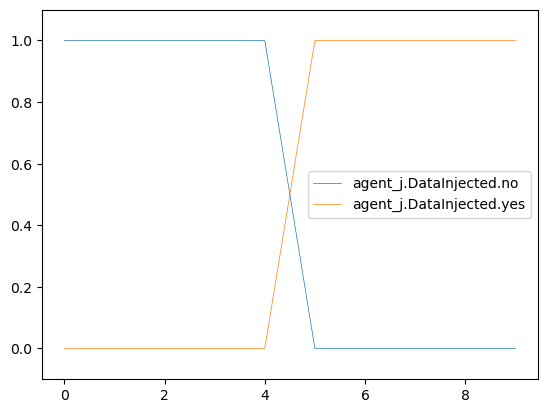

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

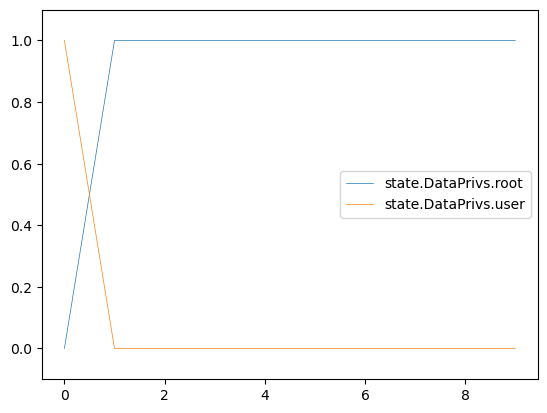

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

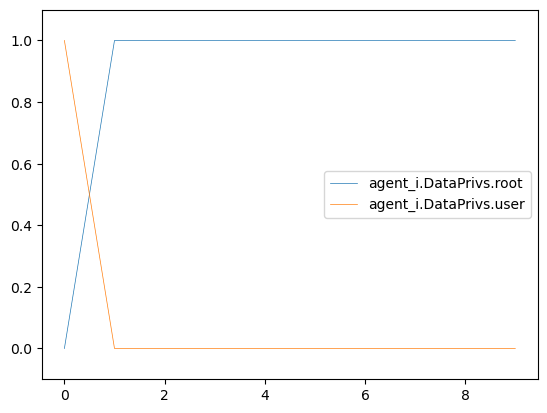

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.995146                0.004854    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000  ManipulateData   
5                1.000000                0.000000            Exit   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

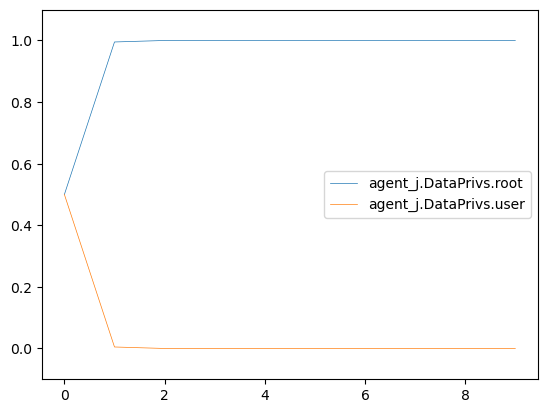

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

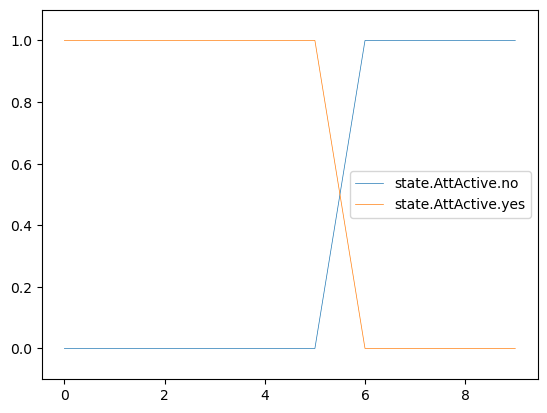

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837884e-01           LogIOCs   
3              0.341597           6.584027e-01               Nop   
4              0.288647           7.113528e-01               Nop   
5              0.124479           8.755214e-01               Nop   
6              0.969299           3.070136e-02               Nop   
7              0.998463           1.537329e-03               Nop   
8              0.999961           3.870737e-05               Nop   
9              1.000000           1.549448e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

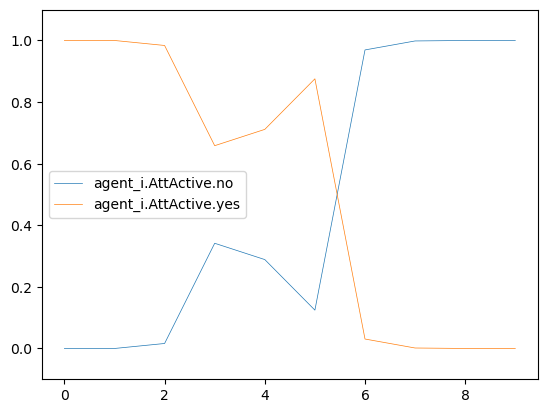

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

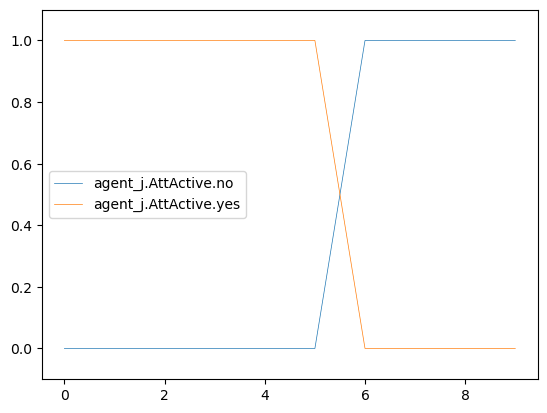

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

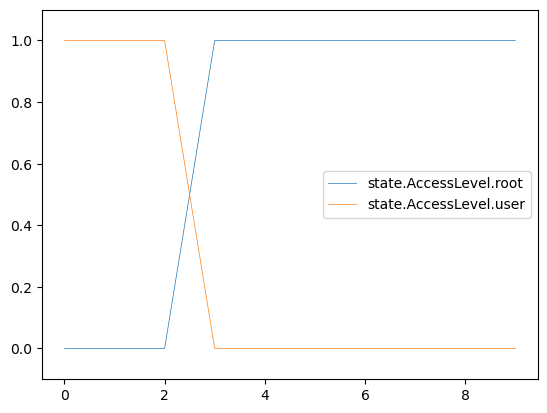

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.543189                  0.456811               Nop   
4                  0.684428                  0.315572               Nop   
5                  0.875521                  0.124479               Nop   
6                  0.852591                  0.147409               Nop   
7                  0.851232                  0.148768               Nop   
8                  0.851197                  0.148803               Nop   
9                  0.851197                  0.148803               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

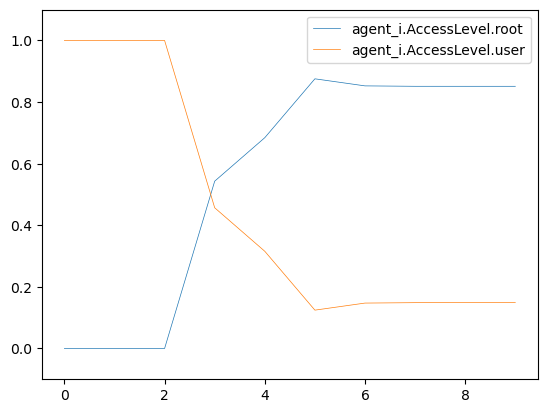

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

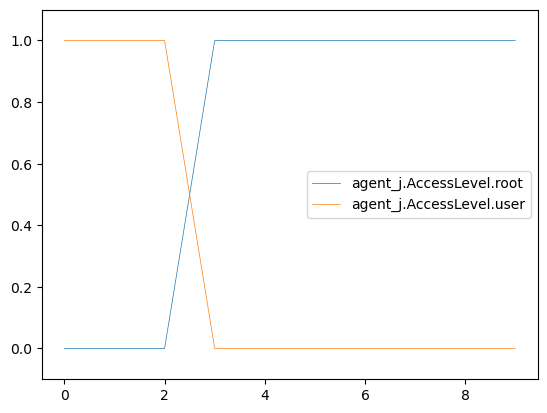

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

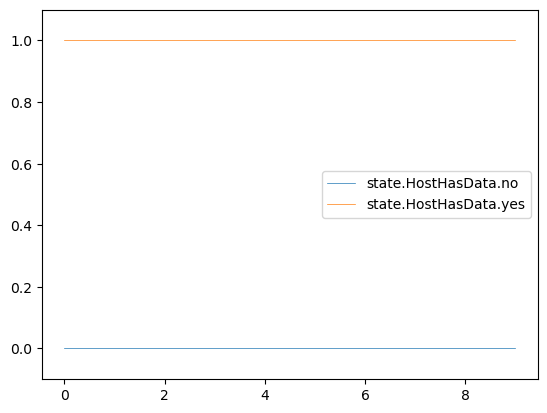

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

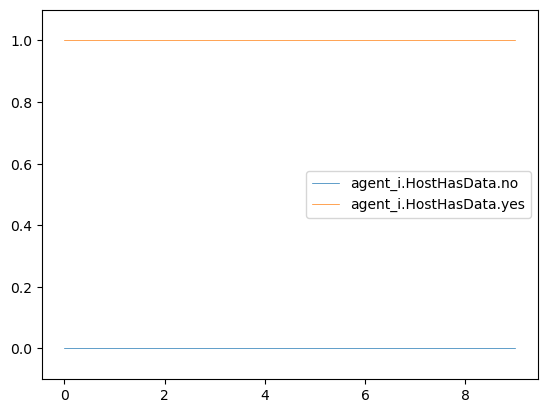

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.071942                 0.928058  ManipulateData   
5                0.000040                 0.999960            Exit   
6                0.000040                 0.999960             Nop   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

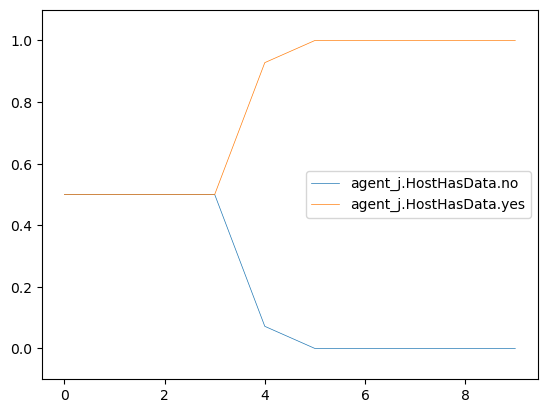

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

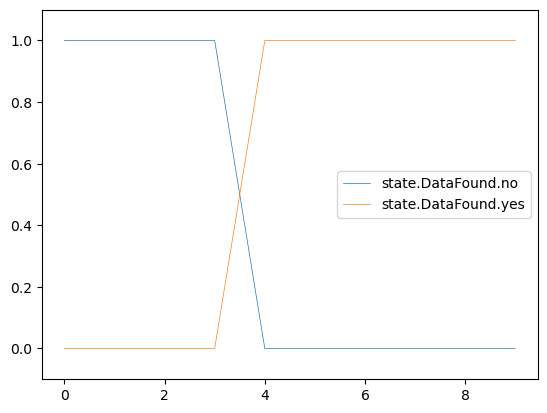

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.722324               0.277676               Nop   
5              0.188337               0.811663               Nop   
6              0.156247               0.843753               Nop   
7              0.155851               0.844149               Nop   
8              0.155877               0.844123               Nop   
9              0.155877               0.844123               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

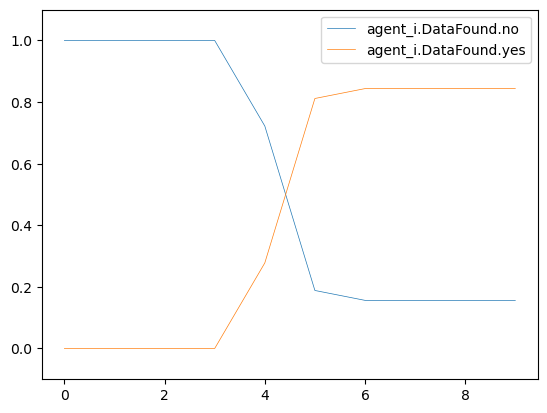

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.093525               0.906475  ManipulateData   
5              0.000052               0.999948            Exit   
6              0.000052               0.999948             Nop   
7              0.000052               0.999948             Nop   
8              0.000052               0.999948             Nop   
9              0.000052               0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

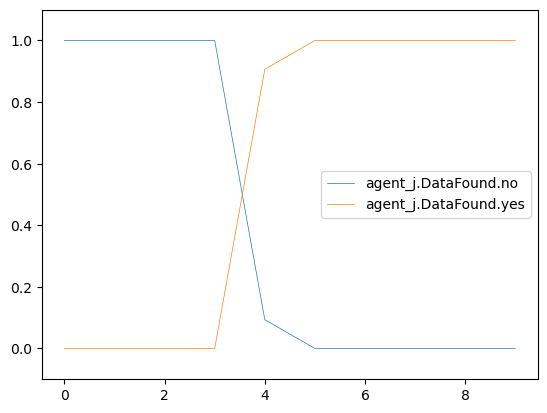

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

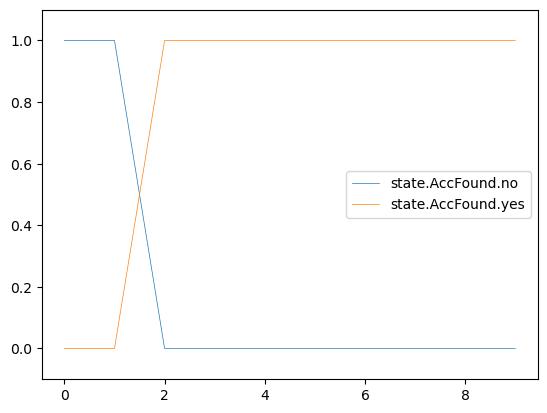

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.312023              0.687977               Nop   
4             0.250943              0.749057               Nop   
5             0.098985              0.901015               Nop   
6             0.117219              0.882781               Nop   
7             0.118301              0.881699               Nop   
8             0.118328              0.881672               Nop   
9             0.118328              0.881672               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

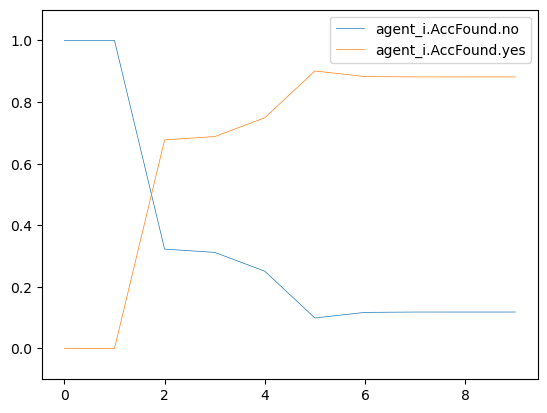

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

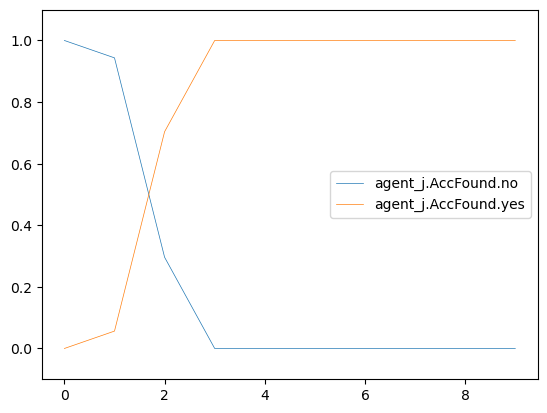

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

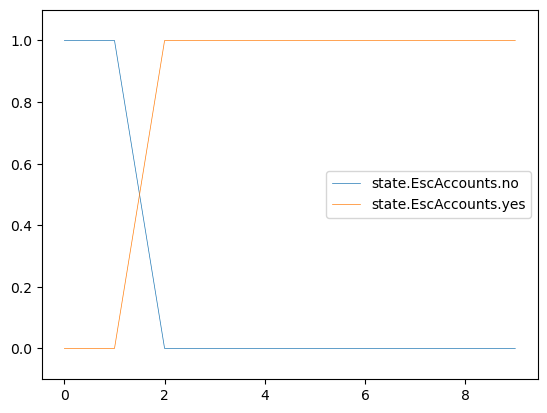

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                       file_write  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                   login_activity  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

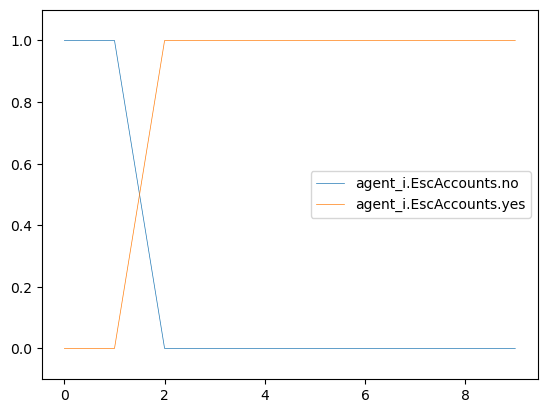

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

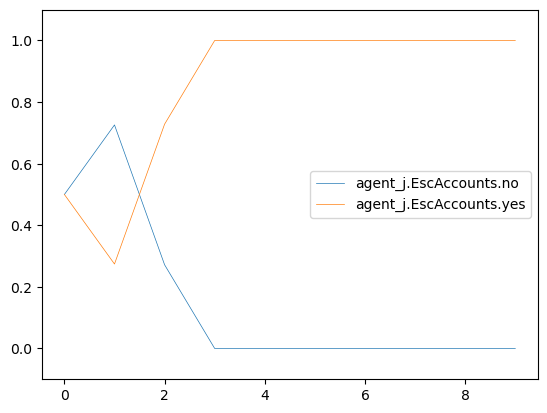

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

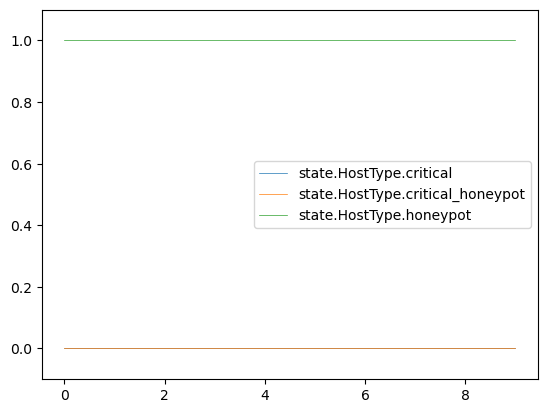

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

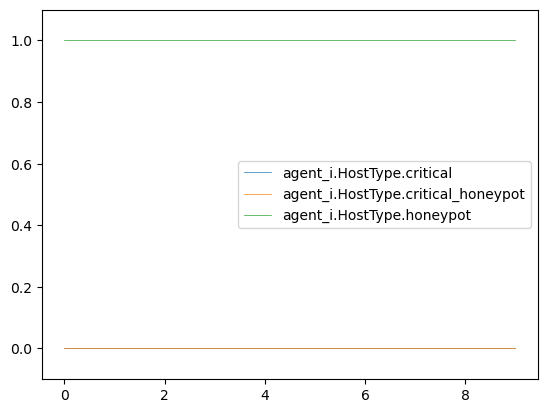

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.815534                                 0.0   
2                   0.665982                                 0.0   
3                   0.499230                                 0.0   
4                   0.299353                                 0.0   
5                   0.299353                                 0.0   
6                   0.299353                                 0.0   
7                   0.299353                                 0.0   
8                   0.299353                                 0.0   
9                   0.299353                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts  RestrictAccPrivs   
1                   0.184466    EnumAccounts      DecoyAccount   
2                   0.334018      PrivEscAcc           LogIOCs   
3                   0.500770       FileRecon               Nop   
4                   0.700647  ManipulateData               Nop   
5                   0.700647            Exit               Nop   
6                   0.700647             Nop               Nop   
7                   0.700647             Nop               Nop   
8                   0.700647             Nop               Nop   
9                   0.700647             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

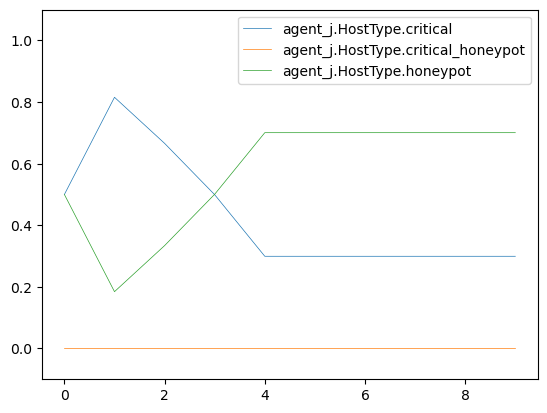

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

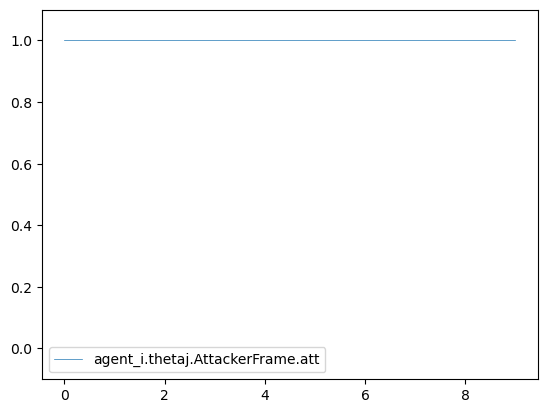

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.928057                        0.071942   
2                         0.928058                        0.071942   
3                         0.928057                        0.071942   
4                         0.928058                        0.071942   
5                         0.928057                        0.071942   
6                         0.928058                        0.071942   
7                         0.928057                        0.071942   
8                         0.928058                        0.071942   
9                         0.928057                        0.071942   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

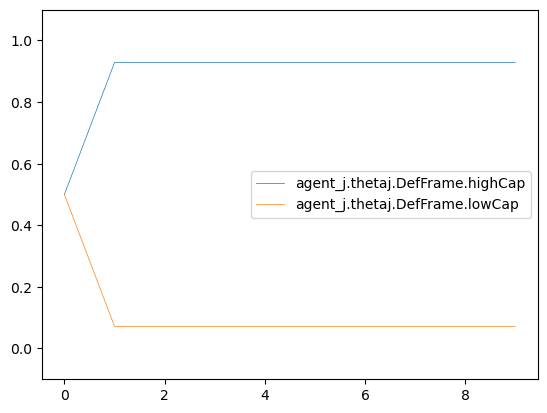

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount           Exit
2                  1.0                   0.0           LogIOCs            Nop
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

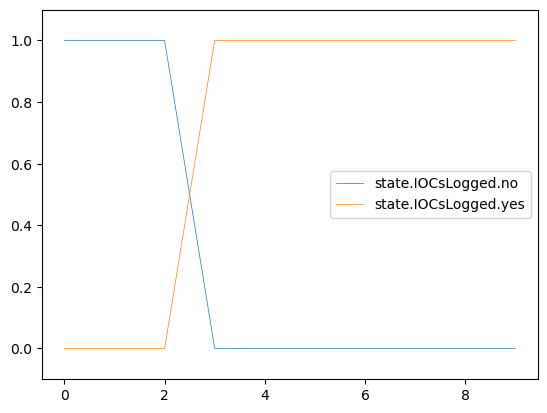

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

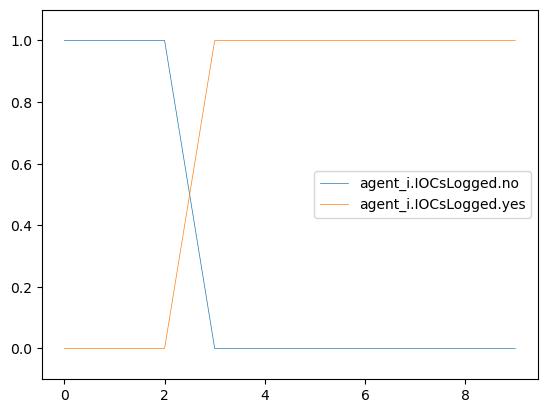

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.093525                0.906475           Exit   
2               0.093525                0.906475            Nop   
3               0.093525                0.906475            Nop   
4               0.093525                0.906475            Nop   
5               0.093525                0.906475            Nop   
6               0.093525                0.906475            Nop   
7               0.093525                0.906475            Nop   
8               0.093525                0.906475            Nop   
9               0.093525                0.906475            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

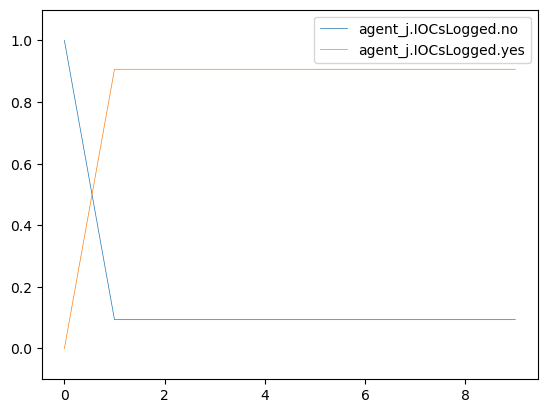

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

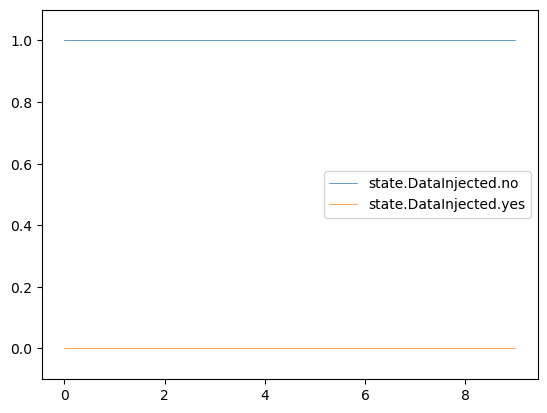

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.127196                  0.872804               Nop   
6                 0.048294                  0.951706               Nop   
7                 0.044429                  0.955571               Nop   
8                 0.043846                  0.956153               Nop   
9                 0.043846                  0.956154               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

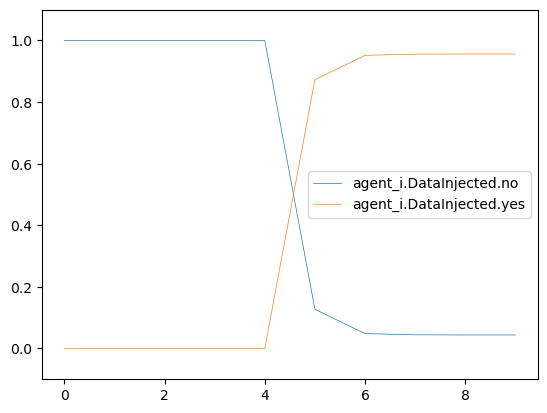

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

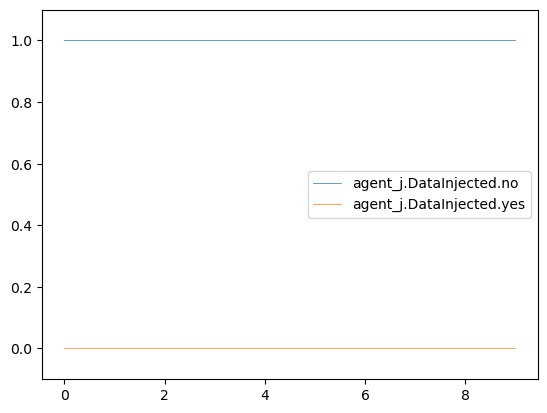

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount           Exit
2                   1.0                   0.0           LogIOCs            Nop
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

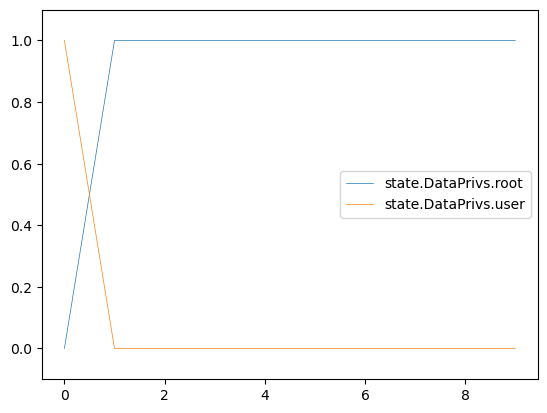

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

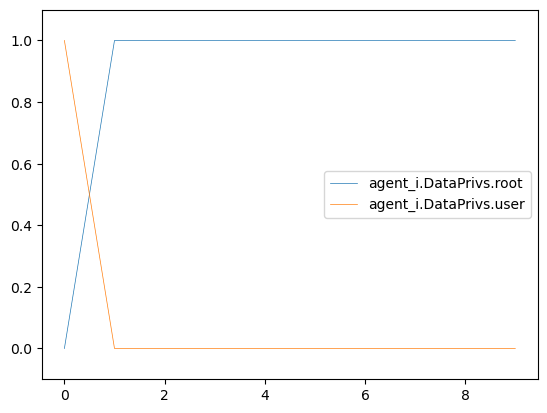

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.546763                0.453237           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

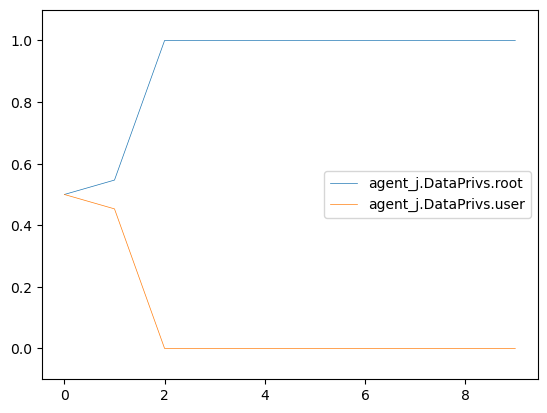

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

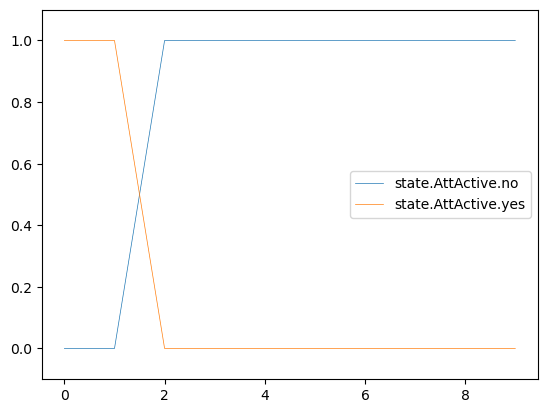

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837883e-01           LogIOCs   
3              0.078750           9.212501e-01               Nop   
4              0.113165           8.868352e-01               Nop   
5              0.033225           9.667749e-01               Nop   
6              0.986251           1.374933e-02               Nop   
7              0.995081           4.919153e-03               Nop   
8              0.999911           8.858526e-05               Nop   
9              1.000000           2.536652e-08               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

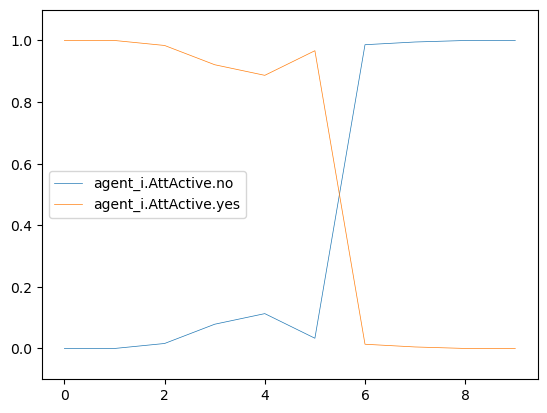

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

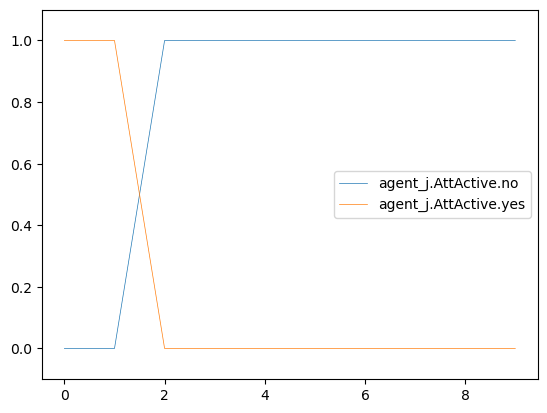

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

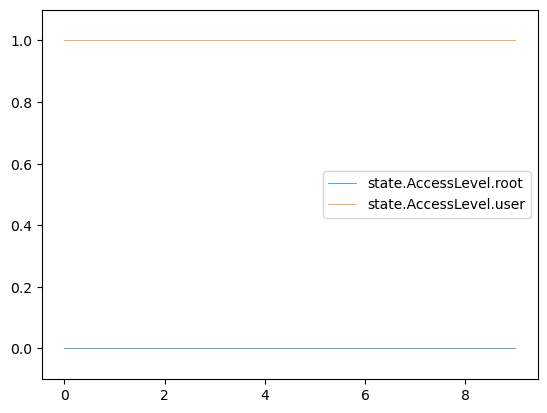

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.876566                  0.123434               Nop   
4                  0.858055                  0.141945               Nop   
5                  0.966775                  0.033225               Nop   
6                  0.964034                  0.035966               Nop   
7                  0.964034                  0.035966               Nop   
8                  0.964015                  0.035985               Nop   
9                  0.964015                  0.035985               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

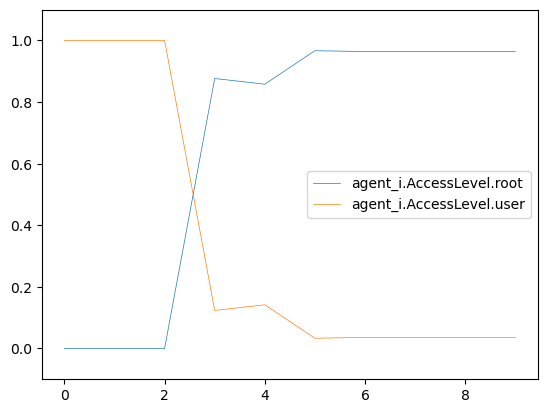

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

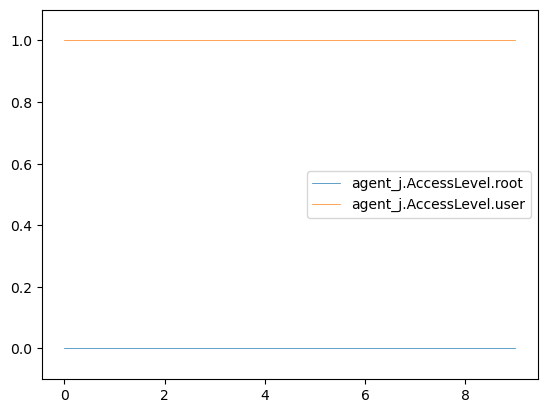

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

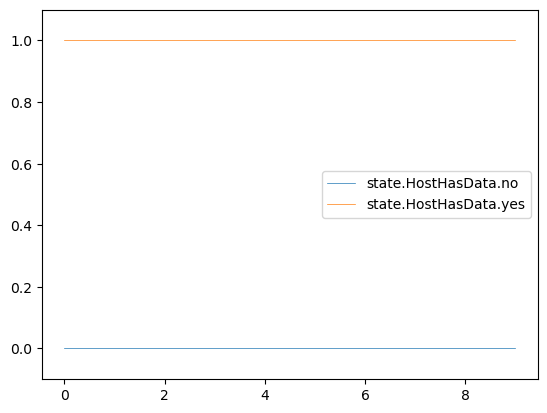

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

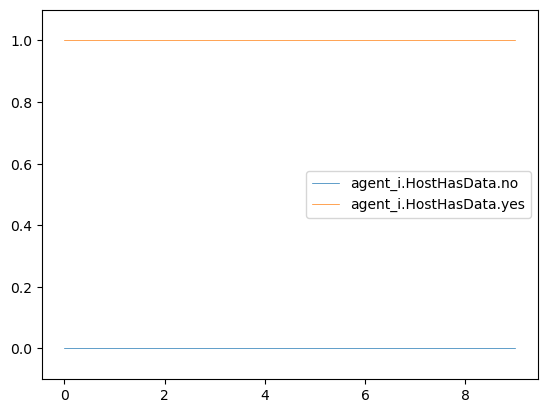

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

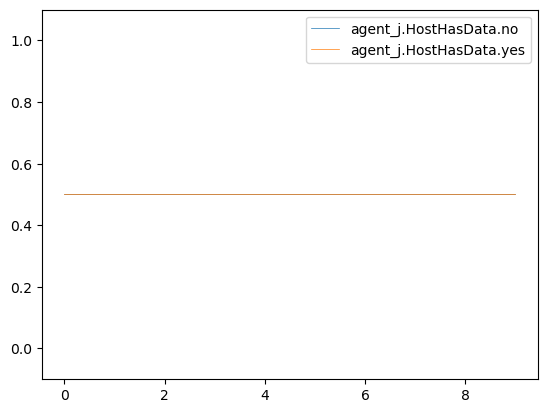

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

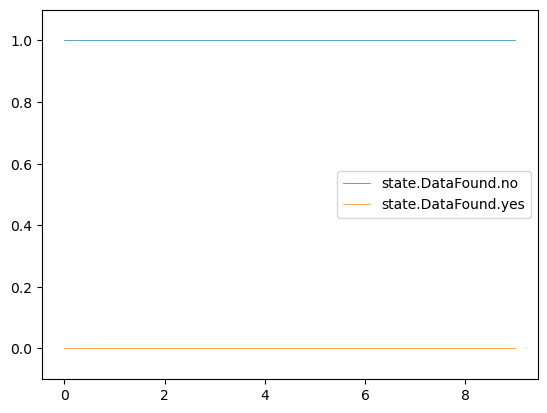

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.408124               0.591876               Nop   
5              0.071807               0.928193               Nop   
6              0.044000               0.956000               Nop   
7              0.043574               0.956426               Nop   
8              0.043588               0.956412               Nop   
9              0.043588               0.956412               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

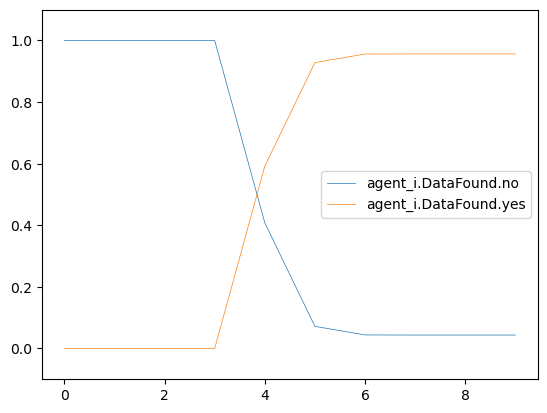

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

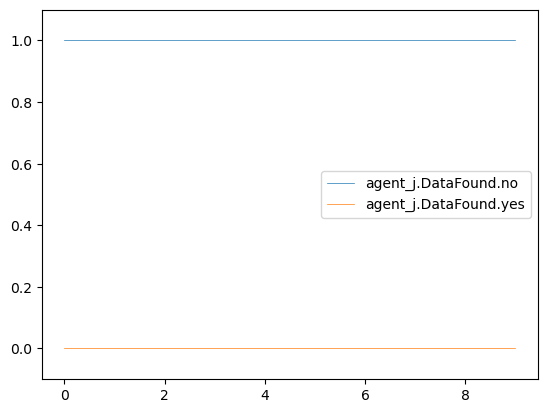

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount           Exit
2                1.0                 0.0           LogIOCs            Nop
3                1.0                 0.0               Nop            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

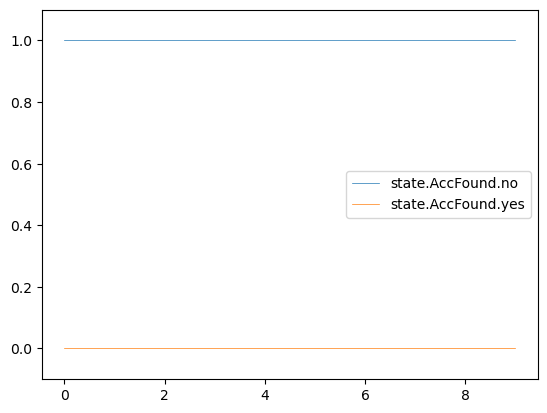

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount           Exit   
2             0.322696              0.677304           LogIOCs            Nop   
3             0.102414              0.897586               Nop            Nop   
4             0.123458              0.876542               Nop            Nop   
5             0.028898              0.971102               Nop            Nop   
6             0.031282              0.968718               Nop            Nop   
7             0.031282              0.968718               Nop            Nop   
8             0.031298              0.968702               Nop            Nop   
9             0.031298              0.968702               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

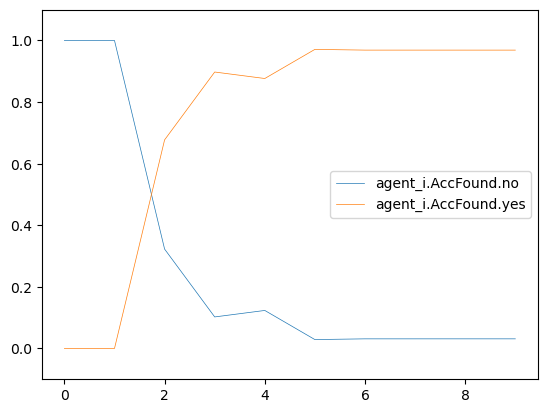

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452           Exit      DecoyAccount   
2             0.943548              0.056452            Nop           LogIOCs   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

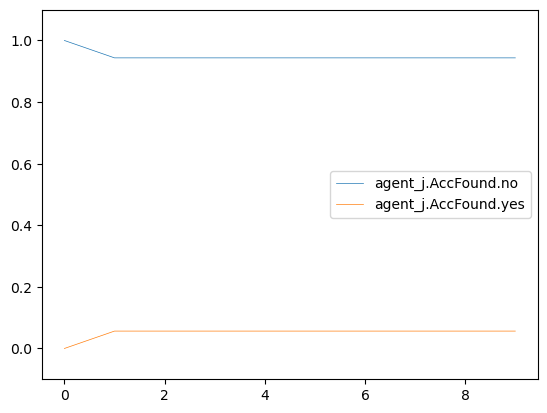

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

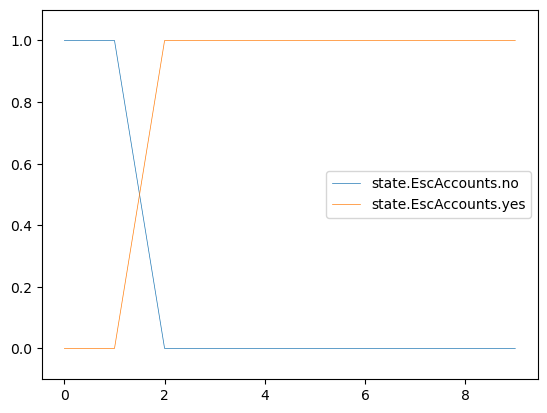

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                        file_enum  
2            Nop                   login_activity  
3            Nop                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

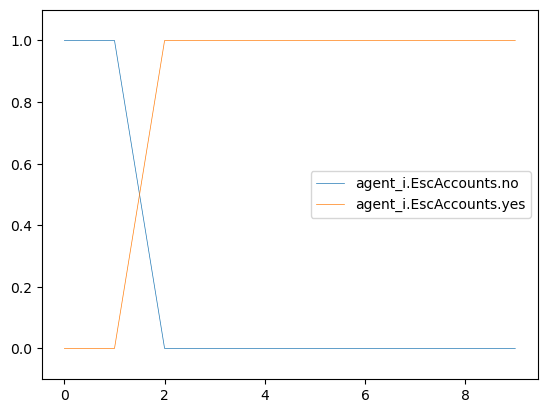

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725807                 0.274194            Nop   
3                0.067881                 0.932119            Nop   
4                0.067881                 0.932119            Nop   
5                0.067881                 0.932119            Nop   
6                0.067881                 0.932119            Nop   
7                0.067881                 0.932119            Nop   
8                0.067881                 0.932119            Nop   
9                0.067881                 0.932119            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

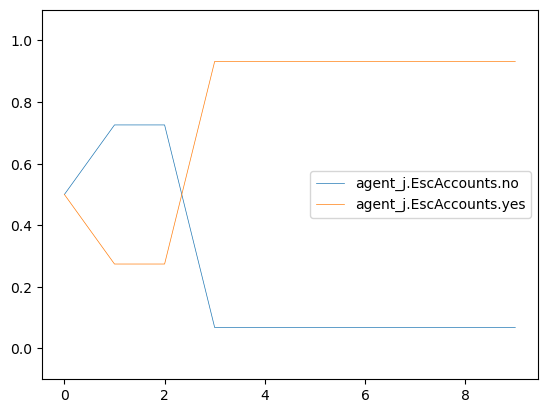

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount           Exit  
2                      1.0           LogIOCs            Nop  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

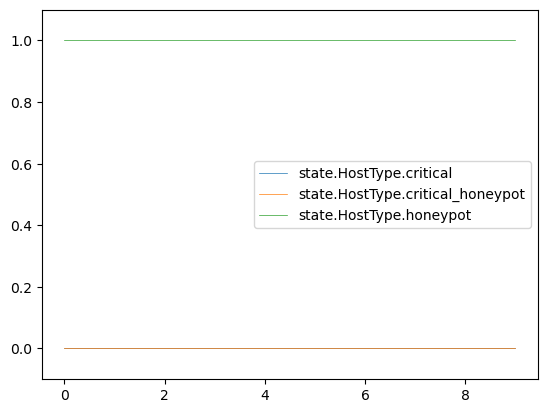

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount           Exit   
2                        1.0           LogIOCs            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

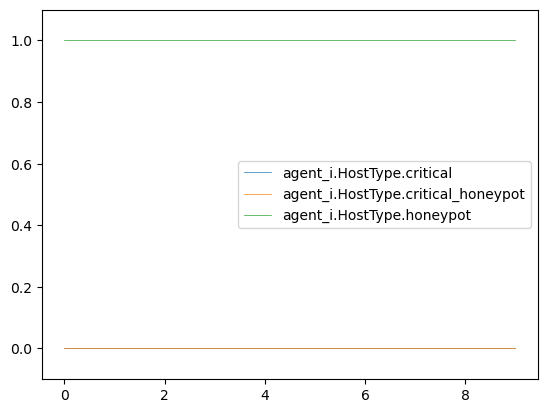

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.043165                                 0.0   
2                   0.043165                                 0.0   
3                   0.043165                                 0.0   
4                   0.043165                                 0.0   
5                   0.043165                                 0.0   
6                   0.043165                                 0.0   
7                   0.043165                                 0.0   
8                   0.043165                                 0.0   
9                   0.043165                                 0.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                   0.500000   EnumAccounts  RestrictAccPrivs   
1                   0.956835           Exit      DecoyAccount   
2                   0.956835            Nop           LogIOCs   
3                   0.956835            Nop               Nop   
4                   0.956835            Nop               Nop   
5                   0.956835            Nop               Nop   
6                   0.956835            Nop               Nop   
7                   0.956835            Nop               Nop   
8                   0.956835            Nop               Nop   
9                   0.956835            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

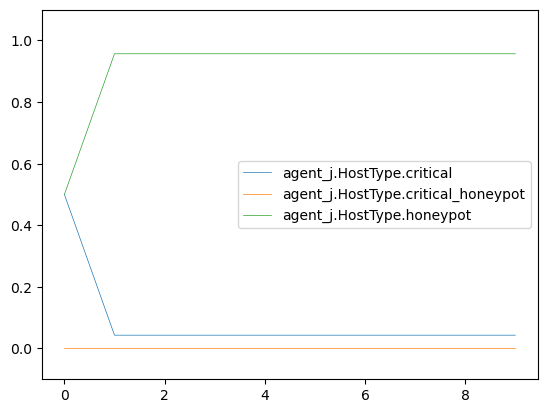

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                       file_write

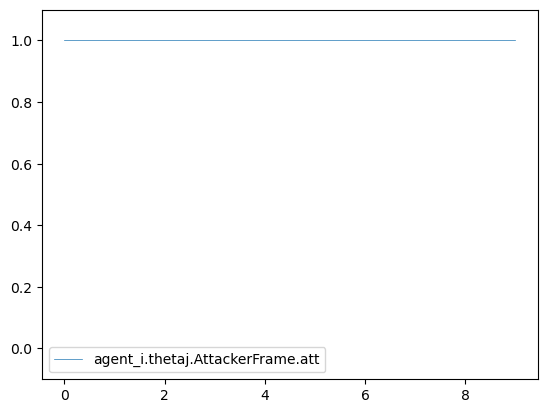

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.928057                        0.071942   
2                         0.928058                        0.071942   
3                         0.928057                        0.071942   
4                         0.928058                        0.071942   
5                         0.928057                        0.071942   
6                         0.928058                        0.071942   
7                         0.928057                        0.071942   
8                         0.928058                        0.071942   
9                         0.928057                        0.071942   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

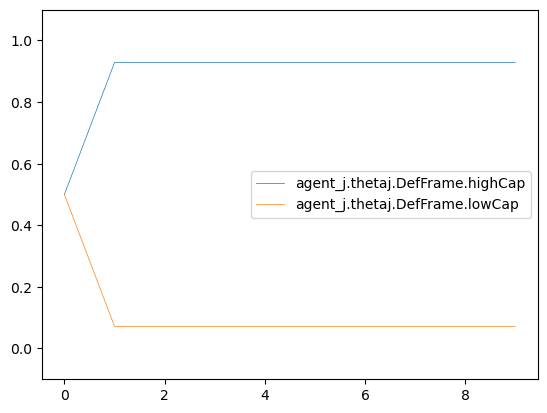

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount           Exit
2                  1.0                   0.0           LogIOCs            Nop
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

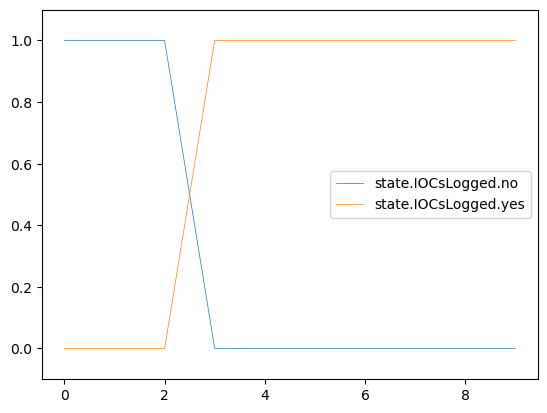

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

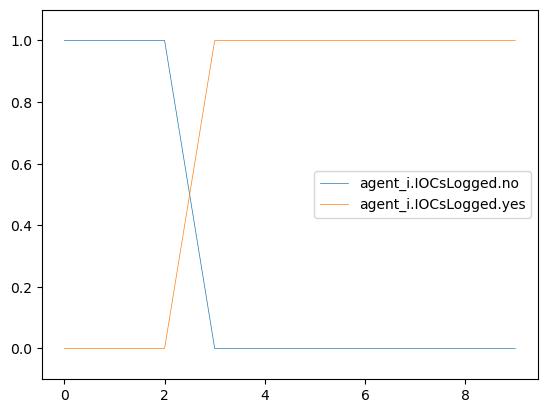

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.093525                0.906475           Exit   
2               0.093525                0.906475            Nop   
3               0.093525                0.906475            Nop   
4               0.093525                0.906475            Nop   
5               0.093525                0.906475            Nop   
6               0.093525                0.906475            Nop   
7               0.093525                0.906475            Nop   
8               0.093525                0.906475            Nop   
9               0.093525                0.906475            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

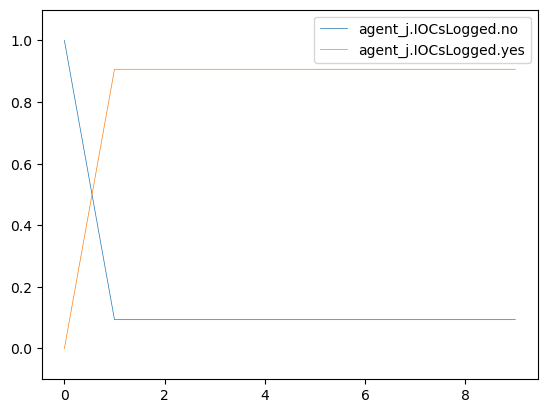

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

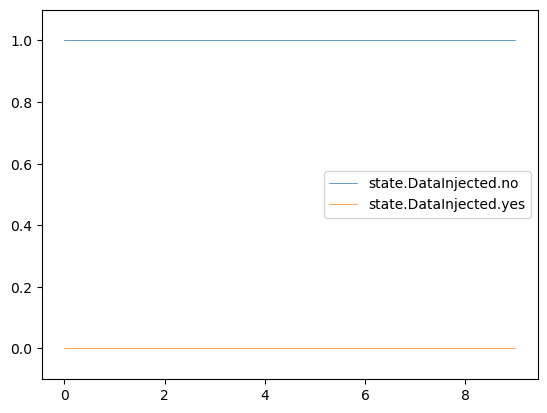

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.999079                  0.000921               Nop   
6                 0.998625                  0.001375               Nop   
7                 0.998496                  0.001504               Nop   
8                 0.998483                  0.001517               Nop   
9                 0.998483                  0.001517               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

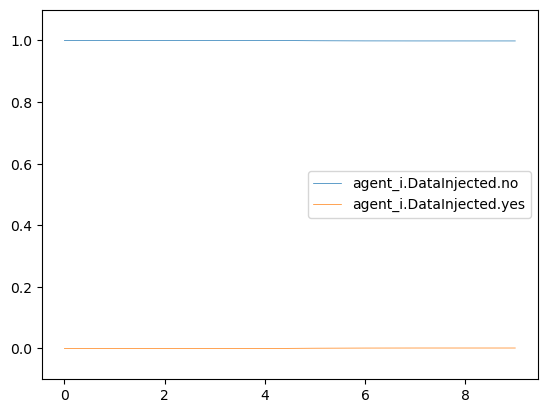

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

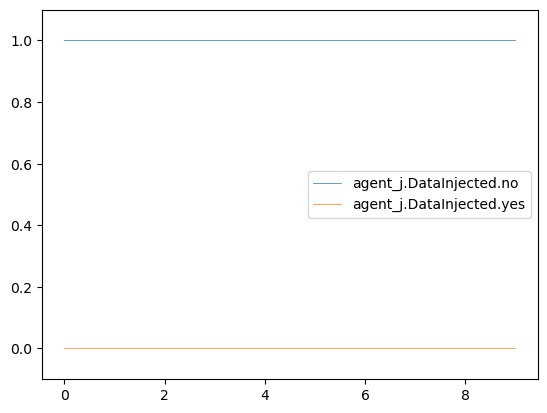

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount           Exit
2                   1.0                   0.0           LogIOCs            Nop
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

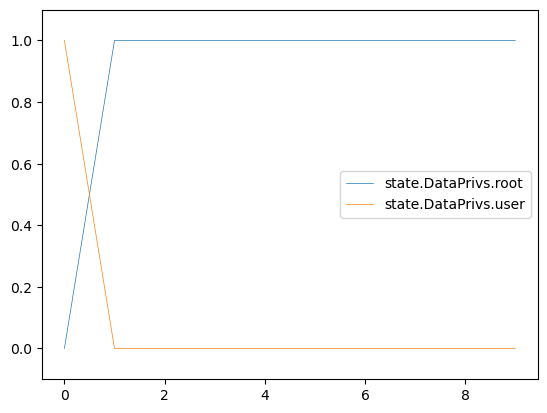

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

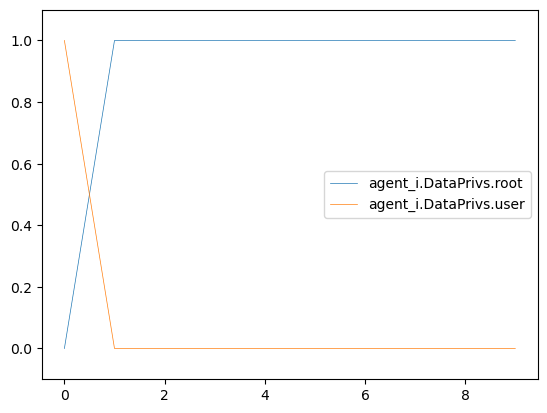

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.546763                0.453237           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

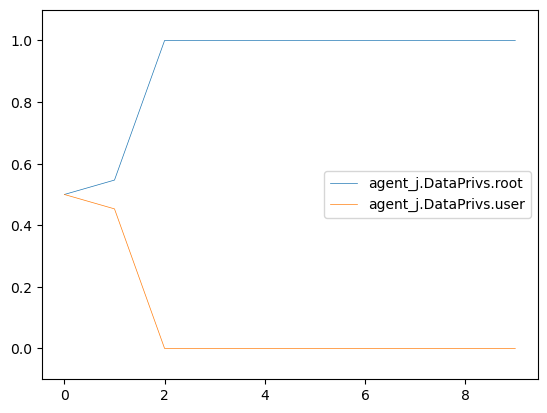

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

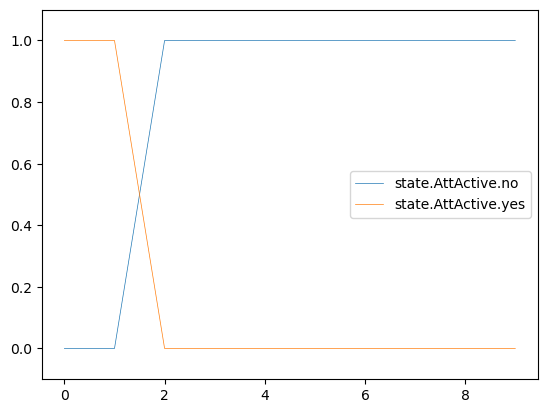

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.423567           5.764331e-01           LogIOCs   
3              0.919434           8.056632e-02               Nop   
4              0.988713           1.128744e-02               Nop   
5              0.998386           1.613926e-03               Nop   
6              0.998206           1.794166e-03               Nop   
7              0.999846           1.539687e-04               Nop   
8              0.999987           1.349578e-05               Nop   
9              1.000000           5.934501e-08               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

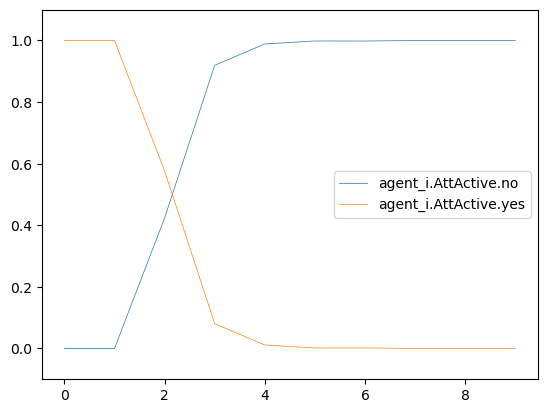

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

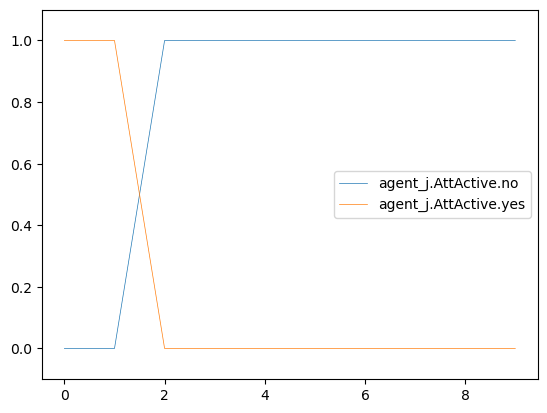

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

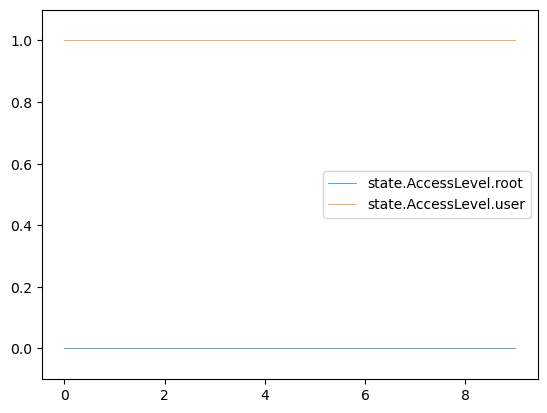

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.066468                  0.933532               Nop   
4                  0.011189                  0.988811               Nop   
5                  0.001614                  0.998386               Nop   
6                  0.002757                  0.997243               Nop   
7                  0.001836                  0.998164               Nop   
8                  0.001836                  0.998164               Nop   
9                  0.001836                  0.998164               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

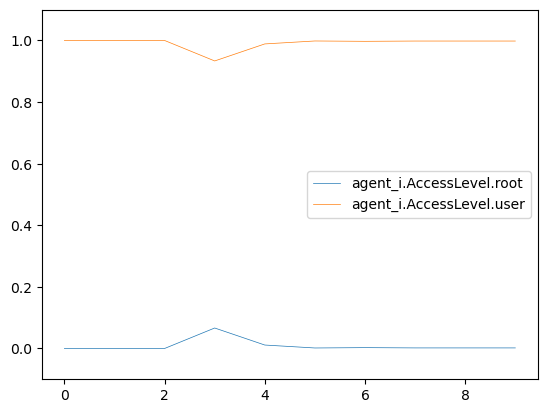

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

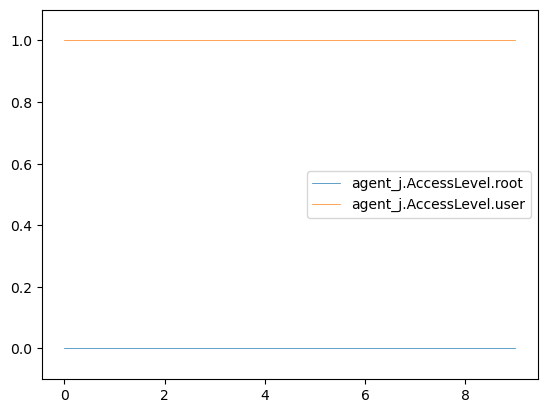

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

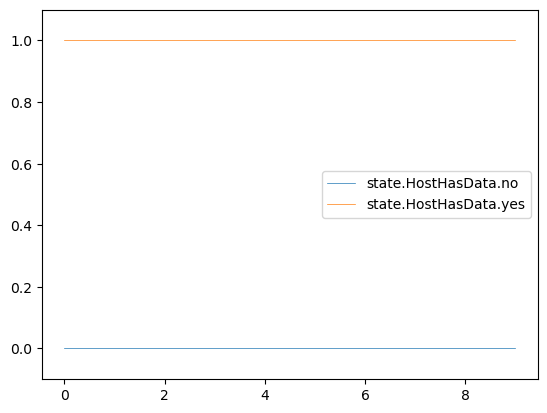

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

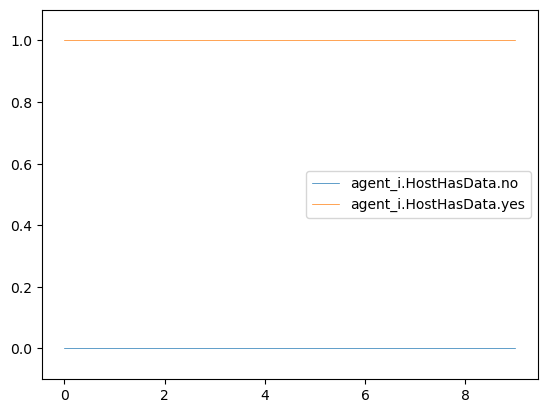

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

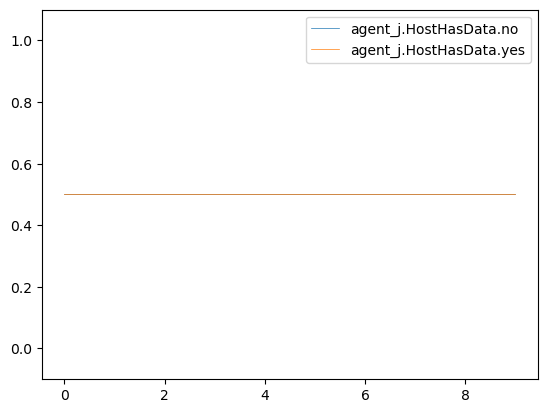

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

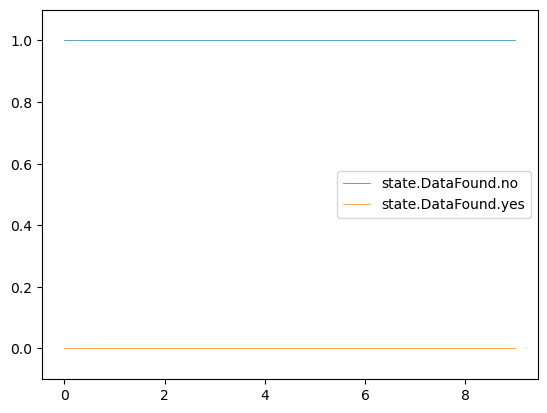

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.992903               0.007097               Nop   
5              0.998579               0.001421               Nop   
6              0.997589               0.002411               Nop   
7              0.998417               0.001583               Nop   
8              0.998417               0.001583               Nop   
9              0.998417               0.001583               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

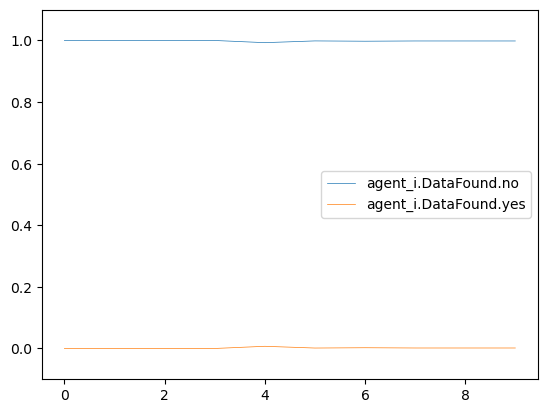

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

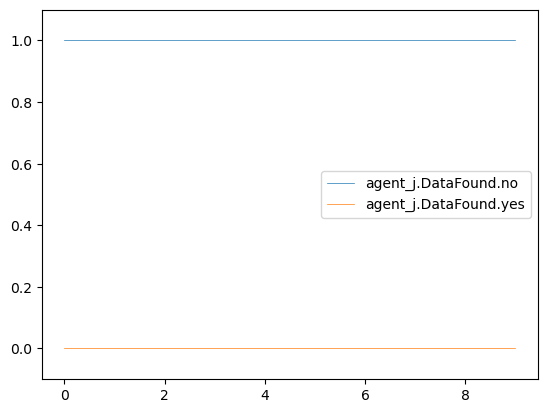

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount           Exit
2                1.0                 0.0           LogIOCs            Nop
3                1.0                 0.0               Nop            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

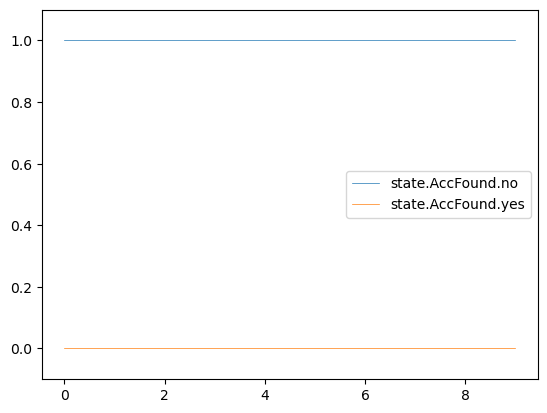

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount           Exit   
2             0.638853              0.361146           LogIOCs            Nop   
3             0.855431              0.144569               Nop            Nop   
4             0.912775              0.087225               Nop            Nop   
5             0.921614              0.078386               Nop            Nop   
6             0.920558              0.079441               Nop            Nop   
7             0.921409              0.078591               Nop            Nop   
8             0.921408              0.078592               Nop            Nop   
9             0.921409              0.078591               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                             none  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                        file_enum  
8                             none  
9                       file_write

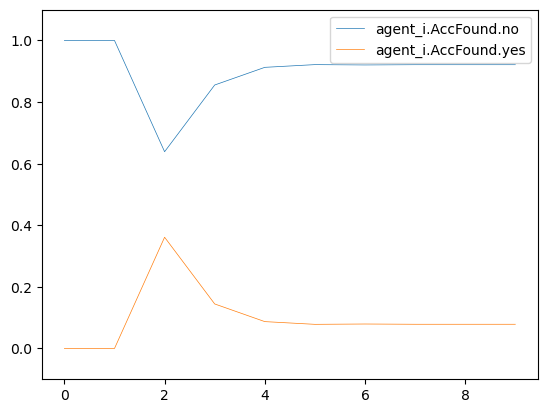

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452           Exit      DecoyAccount   
2             0.943548              0.056452            Nop           LogIOCs   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

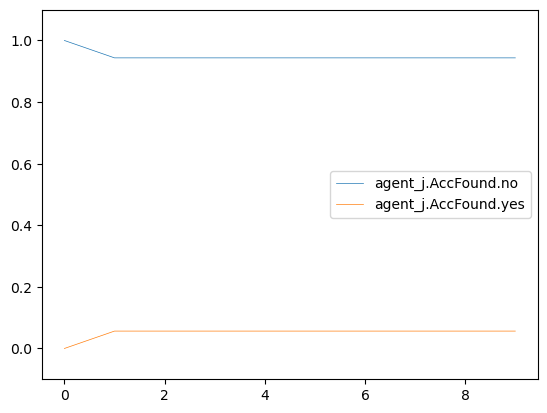

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

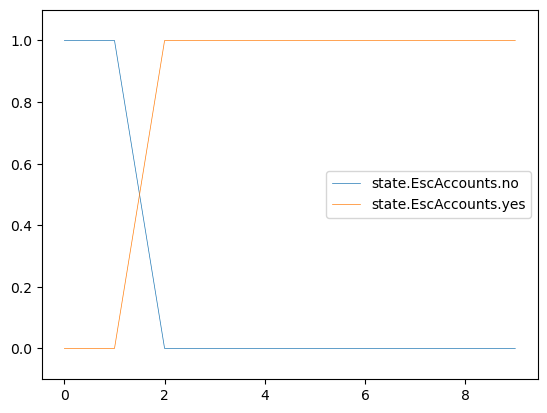

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                       file_write  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

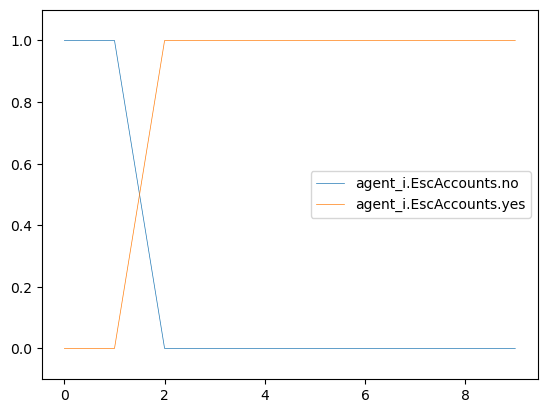

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725807                 0.274194            Nop   
3                0.067881                 0.932119            Nop   
4                0.067881                 0.932119            Nop   
5                0.067881                 0.932119            Nop   
6                0.067881                 0.932119            Nop   
7                0.067881                 0.932119            Nop   
8                0.067881                 0.932119            Nop   
9                0.067881                 0.932119            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

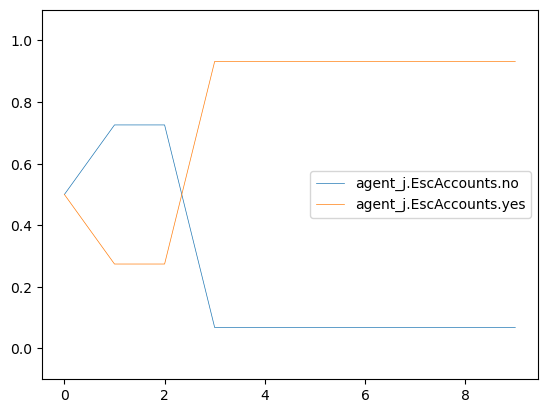

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount           Exit  
2                      1.0           LogIOCs            Nop  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

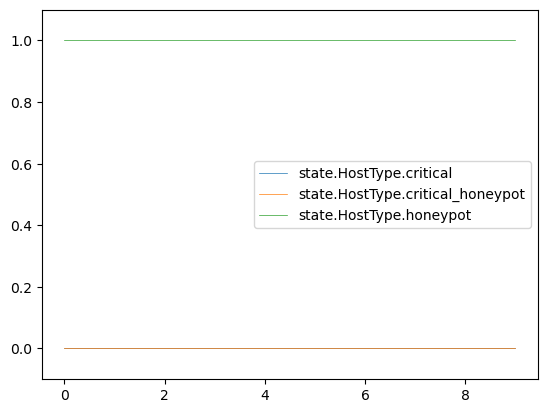

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount           Exit   
2                        1.0           LogIOCs            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                             none  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                        file_enum  
8                             none  
9                       file_write

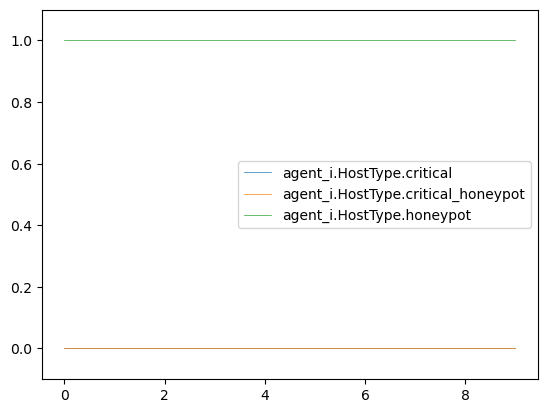

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.043165                                 0.0   
2                   0.043165                                 0.0   
3                   0.043165                                 0.0   
4                   0.043165                                 0.0   
5                   0.043165                                 0.0   
6                   0.043165                                 0.0   
7                   0.043165                                 0.0   
8                   0.043165                                 0.0   
9                   0.043165                                 0.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                   0.500000   EnumAccounts  RestrictAccPrivs   
1                   0.956835           Exit      DecoyAccount   
2                   0.956835            Nop           LogIOCs   
3                   0.956835            Nop               Nop   
4                   0.956835            Nop               Nop   
5                   0.956835            Nop               Nop   
6                   0.956835            Nop               Nop   
7                   0.956835            Nop               Nop   
8                   0.956835            Nop               Nop   
9                   0.956835            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

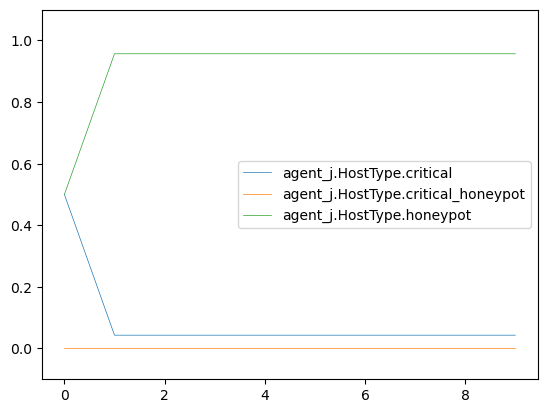

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    